<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Project Python for Data Science: Austo Motor Company Data Analysis</center></h1>

## **Context**

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.


## **Objective**
Austo Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business..

## **Data Description**

The data contains the different data related to a Austo Motor Company. The detailed data dictionary is given below.

## **Data Dictionary**

* Age: The age of the individual in years.
* Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Price: The price of a product or service.
* Make: The type of automobile•

## **Data Overview**

### 1. Import Required Libraries:-

In [5]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to get current working directory path 
import os

### 2. Load/Read the Dataset:-

In [7]:
# Read the dataset
path = os.getcwd() + '\\austo_automobile.csv'
df = pd.read_csv(path)

# Return the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


### 3. Understanding the Data Structure & Data-types:-

#### No. of rows and columns in the data:-

In [10]:
# Check the shape of the dataset
df.shape

(1581, 14)

#### Check the types of the data:-

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


#### Analyze Categorical values:-

In [14]:
#print all columns
col = df.columns
print(col,'\n')

#Analyze each categorical attribute to check for any error in values
for i in col:
    if df[i].dtypes == 'object':
        print('-'*100)
        print(i,':-\n')
        print('Unique Values =',df[i].unique(),'\n')
        print('Column Value Count',df[i].value_counts(),'\n')

#Check for Duplicate entries
print('Duplicate Count: ',df.duplicated().sum())

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object') 

----------------------------------------------------------------------------------------------------
Gender :-

Unique Values = ['Male' 'Femal' 'Female' nan 'Femle'] 

Column Value Count Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
Profession :-

Unique Values = ['Business' 'Salaried'] 

Column Value Count Profession
Salaried    896
Business    685
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
Marital_status :-

Unique Values = ['Married' 'Single'] 

Column Value Count Marital_status
Married    1443
Single      138
Name: 

**Inference:-**

- **Age:** Integer Type | No null/missing values | Recommeded to treat this as a categorical variable rather than numerical
- **Gender:** Object Type | Null values found | Spelling mistakes found | Appropriate null value treatment required
- **Profession:** Object Type | No null/missing values | No treatment required
- **Marital_status:** Object Type | No null/missing values | No treatment required
- **Education:** Object Type | No null/missing values | No treatment required
- **No_of_Dependents:** Integer Type | No null/missing values | Recommeded to treat this as a categorical variable rather than numerical
- **Personal_loan:** Object Type | No null/missing values | No treatment required
- **House_loan:** Object Type | No null/missing values | No treatment required
- **Partner_working:** Object Type | No null/missing values | No treatment required
- **Salary:** Integer Type | No null/missing values | For consistency & to avoid any loss of decimal information, change data type to float
- **Partner_salary:** Float Type | Null values found | Appropriate null value treatment required
- **Total_salary:** Integer Type | No null/missing values | For consistency & to avoid any loss of decimal information, change data type to float | Compute the value again post Partner salary treatment as it is a derived attribute
- **Price:** Integer Type | No null/missing values | For consistency & to avoid any loss of decimal information, change data type to float
- **Make:** Object Type | No null/missing values | No treatment required
- No duplicate entries             

### 4. Data Treatment: Check & treat Data-types, Missing-values & Error-values (i.e. Data Irregularities) appropriately

In [17]:
#Change Int Data-type to Float for Salary, Total_salary, Price
df[['Salary','Total_salary','Price']] = df[['Salary','Total_salary','Price']].astype(float)

#Change Int Data-type to object for No_of_Dependents
df[['No_of_Dependents']] = df[['No_of_Dependents']].astype(object)

#lets create another columnn that categorizes Age into 3 categories | Young (<31), Middle-aged (31-45), Old (>45)
def age_cat(x):
    if x <= 30:
        return 'Young (Below 31)'
    elif x <= 45:
        return 'Middle-aged (31-45)'
    else:
        return 'Old (>45)'

df['Age_category'] = df['Age'].apply(age_cat)
print(df['Age_category'].value_counts())

df.info()

Age_category
Young (Below 31)       958
Middle-aged (31-45)    488
Old (>45)              135
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   float64
 13  Make              1581 non-null   object 
 14  Age_category    

In [18]:
# Check for missing values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
Age_category          0
dtype: int64

In [19]:
# Check what percentage are missing/values in the dataset
for i in col:
    if df[i].isnull().sum()>0:
        print(df[i].value_counts(normalize=True, dropna=False),'\n','-'*50)

Gender
Male      0.758381
Female    0.206831
NaN       0.033523
Femal     0.000633
Femle     0.000633
Name: proportion, dtype: float64 
 --------------------------------------------------
Partner_salary
0.0        0.394054
NaN        0.067046
40500.0    0.018343
40200.0    0.017078
40100.0    0.015813
             ...   
45800.0    0.000633
27300.0    0.000633
22900.0    0.000633
23100.0    0.000633
35000.0    0.000633
Name: proportion, Length: 150, dtype: float64 
 --------------------------------------------------


In [20]:
#Treat Gender Null/Error Values

#Replace Error values
df['Gender'] = df['Gender'].replace(['Femal','Femle'],'Female')
print(df['Gender'].value_counts(normalize=True, dropna=False))

#3% rows have unknown values so it is not recommended to drop them
#76% data is of males so we have the null values replaced with 'Male' (i.e. mode)
df['Gender'].fillna('Male', inplace =True)
print(df['Gender'].value_counts(normalize=True, dropna=False))

Gender
Male      0.758381
Female    0.208096
NaN       0.033523
Name: proportion, dtype: float64
Gender
Male      0.791904
Female    0.208096
Name: proportion, dtype: float64


C:\Users\Maheep-Zephyrus\AppData\Local\Temp\ipykernel_56584\112156892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Male', inplace =True)


In [21]:
#Treat Partner_salary Null/Error Values

# Create a subset DataFrame where Partner_salary is null to further analyze this data
df_PS_null = df[df['Partner_salary'].isnull()==True]
#Lets analyze Partner Salaries for Single People
print('Partner Null values by Marital Status before Treatment\n',df_PS_null['Marital_status'].value_counts())
#Single People don't have a partner, hence, their Partner Income is Zero. Replace Single People Partner Salary Null values with 0.
df.loc[(df['Partner_salary'].isnull()==True) & (df['Marital_status']=='Single'),'Partner_salary'] = 0
df_PS_null = df[df['Partner_salary'].isnull()==True]
print('Partner Null values by Marital Status after Treatment\n',df_PS_null['Marital_status'].value_counts())

#Lets analyze Partner Salaries whose partners are not working
print('Partner Null values by Partner_working before Treatment\n',df_PS_null['Partner_working'].value_counts())
#Partner not working would have no Partner Salary. Replace them with 0.
df.loc[(df['Partner_salary'].isnull()==True) & (df['Partner_working']=='No'),'Partner_salary'] = 0
df_PS_null = df[df['Partner_salary'].isnull()==True]
print('Partner Null values by Partner_working after Treatment\n',df_PS_null['Partner_working'].value_counts())

#Partner working would have salary = Total Salary - Salary. Replace the null values of Partner working data with this computation
df.loc[(df['Partner_salary'].isnull()==True) & (df['Partner_working']=='Yes'),'Partner_salary'] = df['Total_salary'] - df['Salary']       

#Null values treatment complete

Partner Null values by Marital Status before Treatment
 Marital_status
Married    90
Single     16
Name: count, dtype: int64
Partner Null values by Marital Status after Treatment
 Marital_status
Married    90
Name: count, dtype: int64
Partner Null values by Partner_working before Treatment
 Partner_working
No     74
Yes    16
Name: count, dtype: int64
Partner Null values by Partner_working after Treatment
 Partner_working
Yes    16
Name: count, dtype: int64


In [22]:
#Compute the Total Salary Again since we have treated the Partner Salary Column
#Lets create a new column & drop the previous one
df['Total_Household_Salary'] = df['Salary'] + df['Partner_salary']
df = df.drop(['Total_salary'], axis=1)
print(df.isnull().sum())
df.info()

Age                       0
Gender                    0
Profession                0
Marital_status            0
Education                 0
No_of_Dependents          0
Personal_loan             0
House_loan                0
Partner_working           0
Salary                    0
Partner_salary            0
Price                     0
Make                      0
Age_category              0
Total_Household_Salary    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1581 non-null   int64  
 1   Gender                  1581 non-null   object 
 2   Profession              1581 non-null   object 
 3   Marital_status          1581 non-null   object 
 4   Education               1581 non-null   object 
 5   No_of_Dependents        1581 non-null   object 
 6   Personal_loan           1581 no

### 5. Dataset Statistical Summary

In [24]:
#Generate Summary statistics of all the columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1581,2,Male,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,5.0,3.0,557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


## **Univariate Analysis**

In [26]:
# Lets create lists for numerical & categorical columns each
def refresh_var():
    num = []
    cat = []
    for i in df.columns:
        if df[i].dtypes == 'object':
            cat.append(i)
        else:
            num.append(i)
    return num, cat

num, cat = refresh_var()

print('Numerical variables: ',num)
print('Categorical variables: ',cat)

Numerical variables:  ['Age', 'Salary', 'Partner_salary', 'Price', 'Total_Household_Salary']
Categorical variables:  ['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make', 'Age_category']


### 1. Numerical Variables

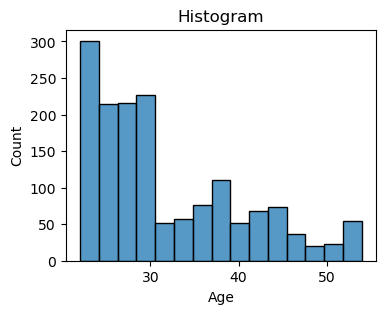

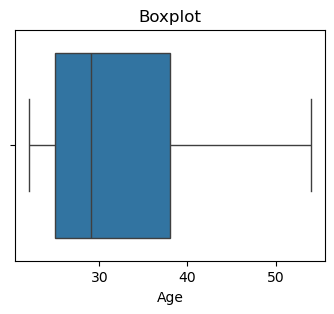

----------------------------------------------------------------------------------------------------


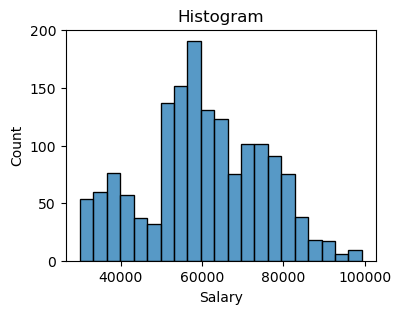

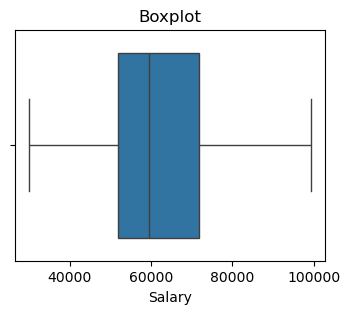

----------------------------------------------------------------------------------------------------


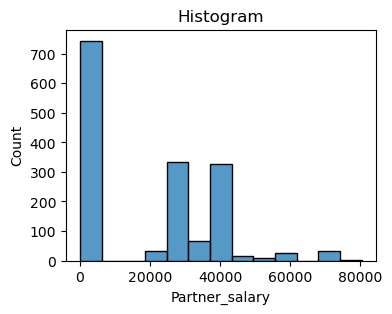

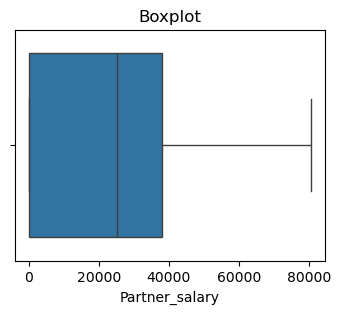

----------------------------------------------------------------------------------------------------


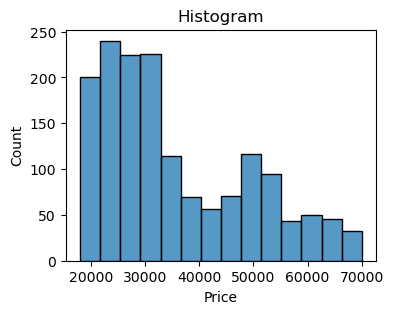

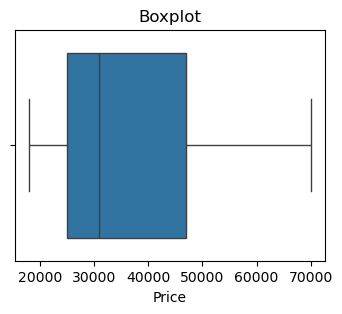

----------------------------------------------------------------------------------------------------


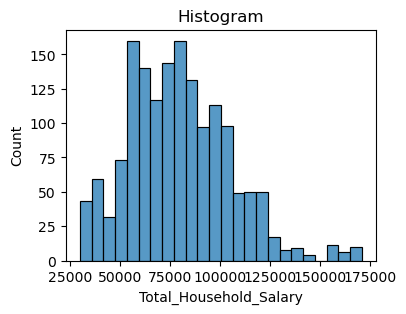

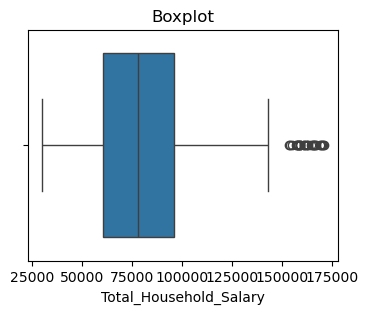

----------------------------------------------------------------------------------------------------


In [28]:
#Diplay Histogram & Boxplot for each Numerical Variable as a quick summary
for i in num:
    plt.figure(figsize=(4,3))
    plt.title('Histogram')
    plt.xlabel(i)
    plt.ylabel('Count')
    sns.histplot(data=df,x=i)
    plt.show()
    
    plt.figure(figsize=(4,3))
    plt.title('Boxplot')
    plt.xlabel(i)
    sns.boxplot(data=df,x=i)
    plt.show()
    print('-'*100)

#### a. Age

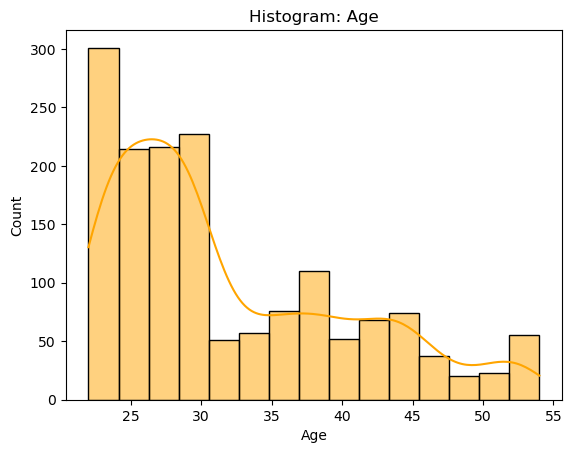

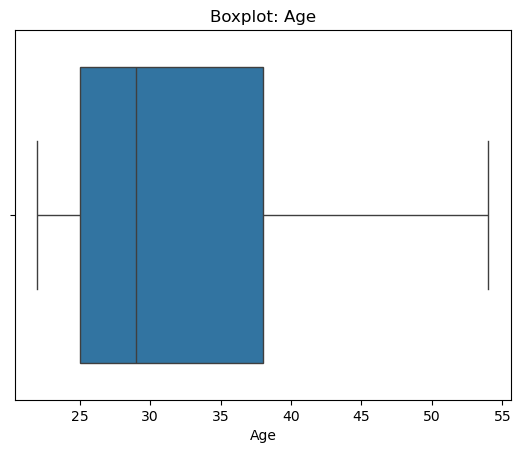

In [30]:
# Analyze Histogram & Boxplot of Age
plt.title('Histogram: Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.histplot(data=df,x='Age',kde=True,color='orange')
plt.show()

plt.title('Boxplot: Age')
plt.xlabel('Age')
sns.boxplot(data=df,x='Age')
plt.show()

num, cat = refresh_var()

#### b. Salary

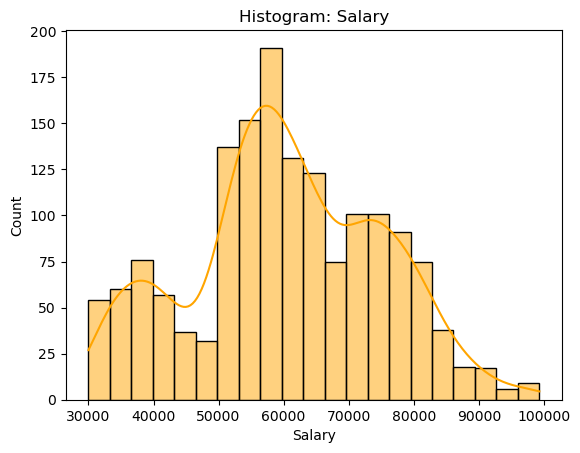

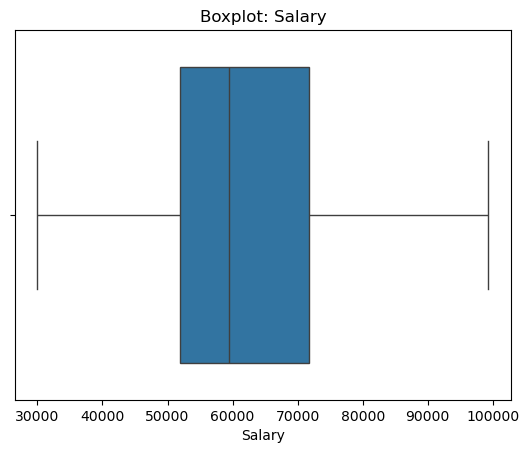

In [32]:
# Analyze Histogram & Boxplot of Salary
plt.title('Histogram: Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
sns.histplot(data=df,x='Salary',kde=True,color='orange')
plt.show()

plt.title('Boxplot: Salary')
plt.xlabel('Salary')
sns.boxplot(data=df,x='Salary')
plt.show()

#### c. Partner Salary

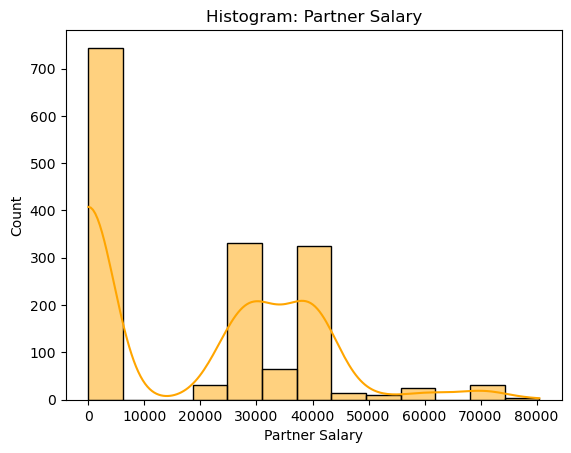

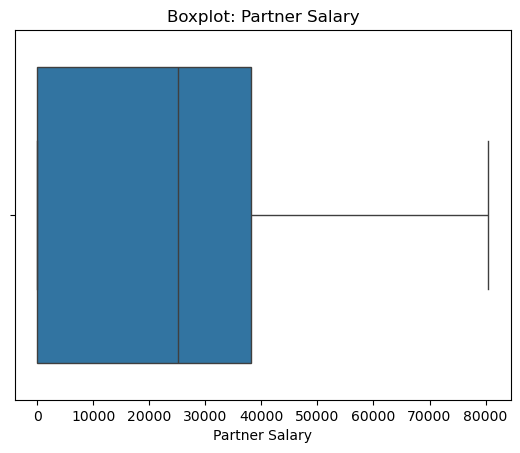

In [34]:
# Analyze Histogram & Boxplot of Partner Salary
plt.title('Histogram: Partner Salary')
plt.xlabel('Partner Salary')
plt.ylabel('Count')
sns.histplot(data=df,x='Partner_salary',kde=True,color='orange')
plt.show()

plt.title('Boxplot: Partner Salary')
plt.xlabel('Partner Salary')
sns.boxplot(data=df,x='Partner_salary')
plt.show()

#### d. Total Household Salary

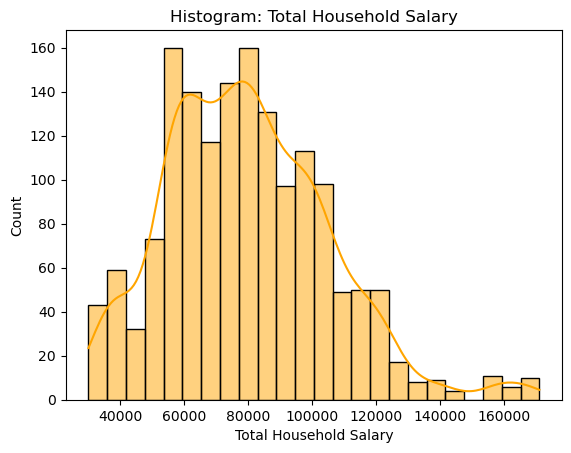

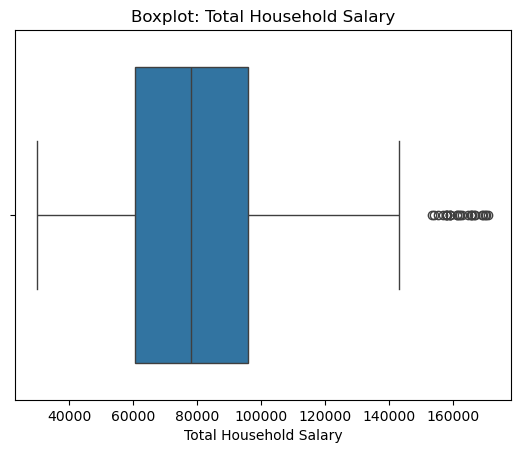

In [36]:
# Analyze Histogram & Boxplot of Total Household Salary
plt.title('Histogram: Total Household Salary')
plt.xlabel('Total Household Salary')
plt.ylabel('Count')
sns.histplot(data=df,x='Total_Household_Salary',kde=True,color='orange')
plt.show()

plt.title('Boxplot: Total Household Salary')
plt.xlabel('Total Household Salary')
sns.boxplot(data=df,x='Total_Household_Salary')
plt.show()

#### e. Price

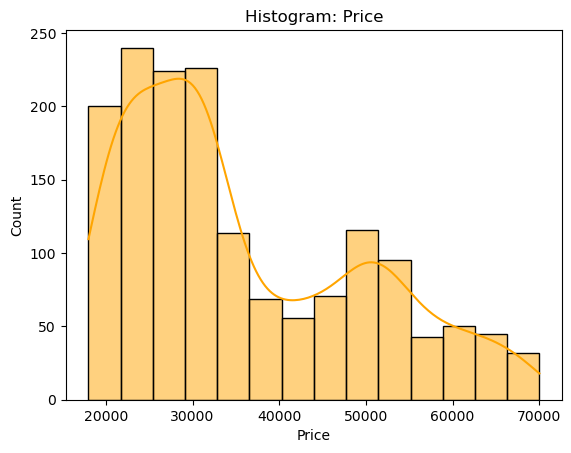

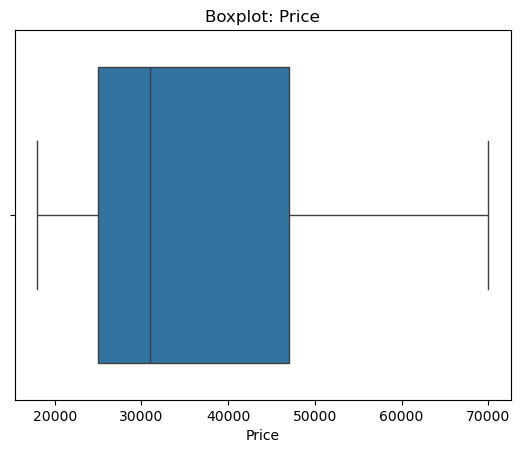

In [38]:
# Analyze Histogram & Boxplot of Price
plt.title('Histogram: Price')
plt.xlabel('Price')
plt.ylabel('Count')
sns.histplot(data=df,x='Price',kde=True,color='orange')
plt.show()

plt.title('Boxplot: Price')
plt.xlabel('Price')
sns.boxplot(data=df,x='Price')
plt.show()

### 2. Outlier Detection & Treatment of Numerical Variables

Lower Wishker at 7400.0 | Upper Whisker at 149000.0
Lower Whisker Outlier Count = 0
Upper Whisker Outlier Count = 27
Total Outlier Count= 27
Outlier Percentage in Total Household Salary= 1.7077798861480076
Mean of Outliers= 162318.5185185185
Median of Outliers= 161800.0


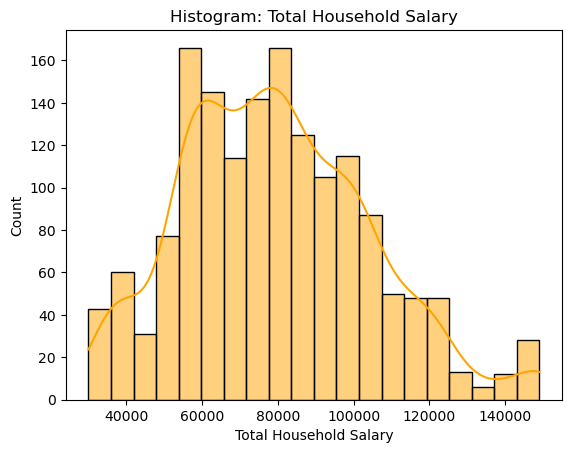

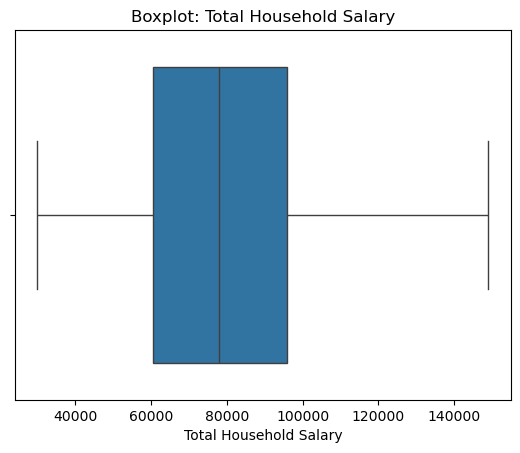

In [40]:
#Total Household Salary seems to have outliers. Lets analyze them

#Define function to get Upper & Lower Whiskers of boxplot
def Whiskers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    LW = Q1 - (Q3-Q1)*1.5
    UW = Q3 + (Q3-Q1)*1.5
    return LW,UW

#Calculate Outlier Count & Percentage
L_Whis,U_Whis = Whiskers(df['Total_Household_Salary'])
UW_count = df[df['Total_Household_Salary']>U_Whis].shape[0]
LW_count = df[df['Total_Household_Salary']<L_Whis].shape[0]
Outlier_count = LW_count + UW_count
Col_count = df['Total_Household_Salary'].shape[0]
Outlier_Percentage = (Outlier_count/Col_count)*100
print('Lower Wishker at',L_Whis,'| Upper Whisker at',U_Whis)
print('Lower Whisker Outlier Count =',LW_count)
print('Upper Whisker Outlier Count =',UW_count)
print('Total Outlier Count=',Outlier_count)
print('Outlier Percentage in Total Household Salary=',Outlier_Percentage)

#Lower Whisker Outliers = None
#Upper Whisker Outliers = 1% of total. Not recommended to drop
#Lets look at the summary stats of Outlier values
print('Mean of Outliers=',df[df['Total_Household_Salary']>U_Whis]['Total_Household_Salary'].mean())
print('Median of Outliers=',df[df['Total_Household_Salary']>U_Whis]['Total_Household_Salary'].median())

#Replace the outliers with the Upper Whisker
df['Total_Household_Salary']=np.where(df['Total_Household_Salary']>U_Whis,U_Whis,df['Total_Household_Salary'])

#Displaying the Histogram & Boxplot of Total Household Salary again post Outlier Treatment
plt.title('Histogram: Total Household Salary')
plt.xlabel('Total Household Salary')
plt.ylabel('Count')
sns.histplot(data=df,x='Total_Household_Salary',kde=True,color='orange')
plt.show()

plt.title('Boxplot: Total Household Salary')
plt.xlabel('Total Household Salary')
sns.boxplot(data=df,x='Total_Household_Salary')
plt.show()

### 3. Categorical Variables

['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make', 'Age_category']


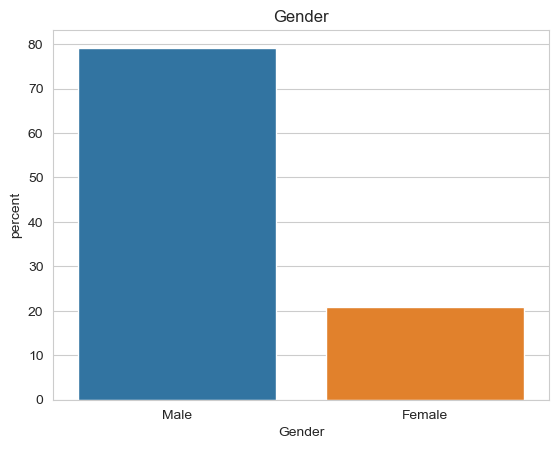

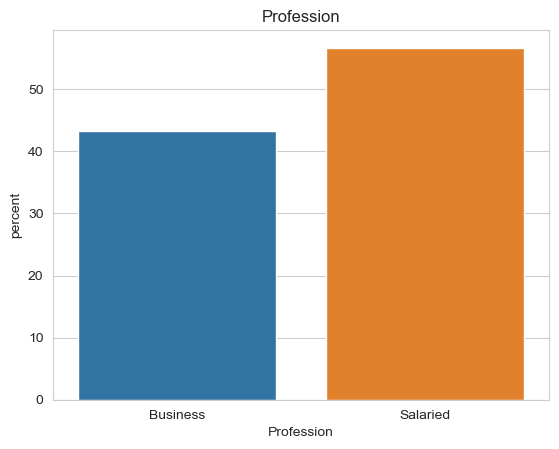

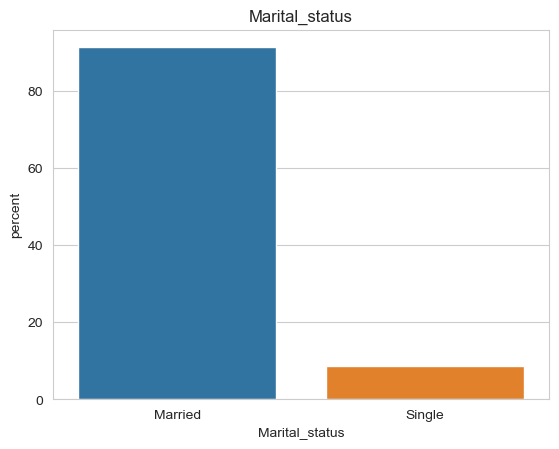

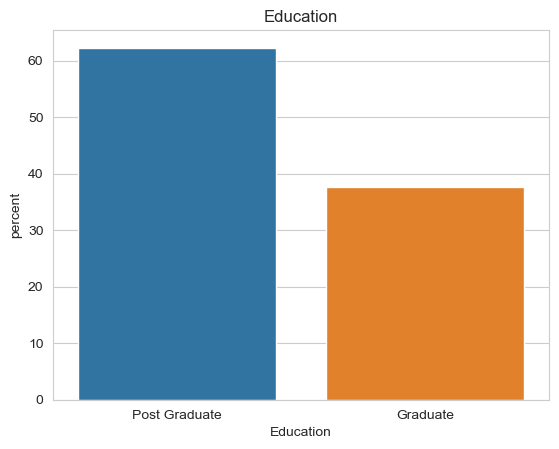

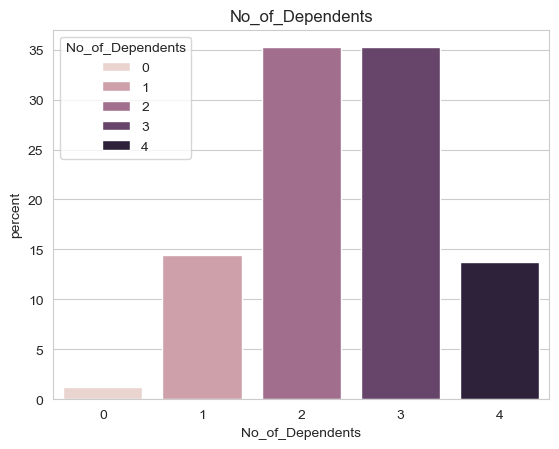

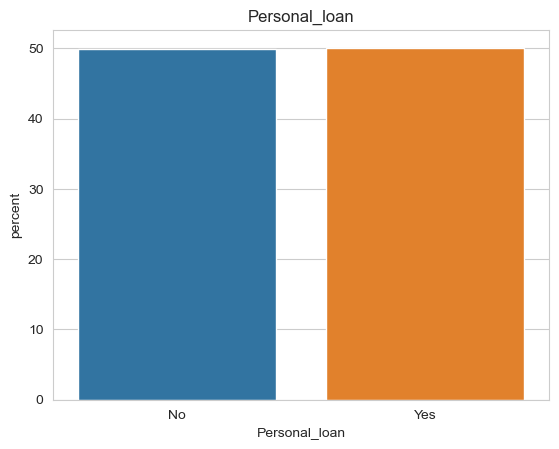

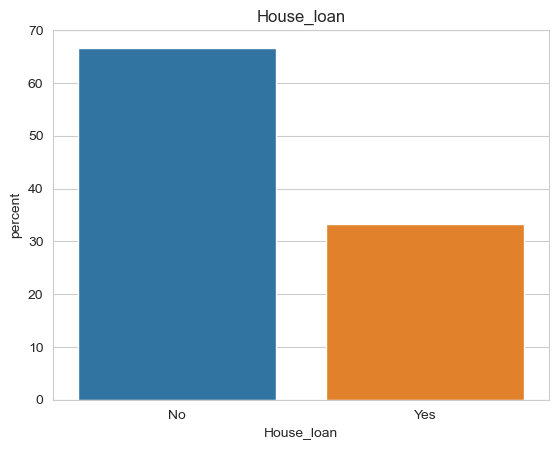

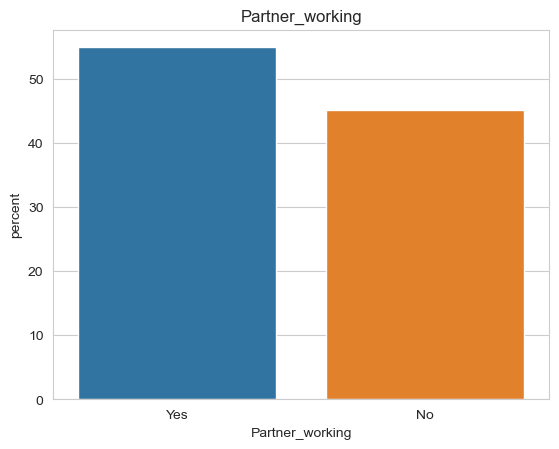

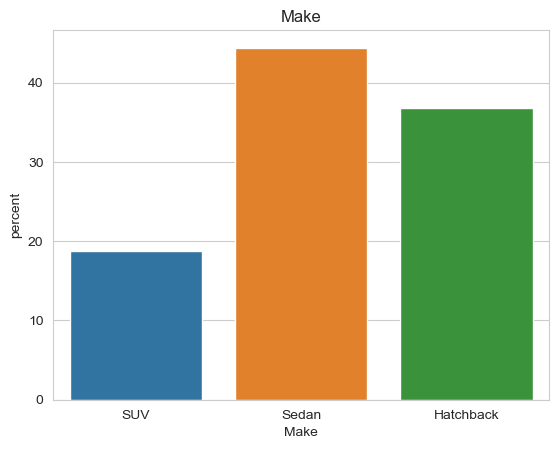

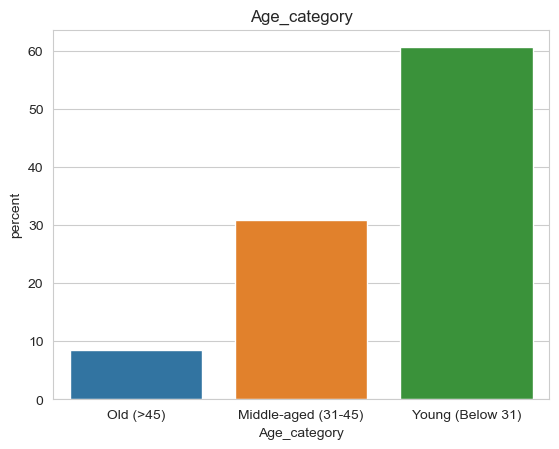

----------------------------------------------------------------------------------------------------
Gender :-

Unique Values = ['Male' 'Female'] 

Column Value Count Gender
Male      1252
Female     329
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
Profession :-

Unique Values = ['Business' 'Salaried'] 

Column Value Count Profession
Salaried    896
Business    685
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
Marital_status :-

Unique Values = ['Married' 'Single'] 

Column Value Count Marital_status
Married    1443
Single      138
Name: count, dtype: int64 

----------------------------------------------------------------------------------------------------
Education :-

Unique Values = ['Post Graduate' 'Graduate'] 

Column Value Count Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64 

------

In [42]:
#Show Categorical varibales
print(cat)

#Show countplots of all categorical variables
sns.set_style("whitegrid") 
for i in cat:
    plt.title(i)
    sns.countplot(data=df, x=i, hue=i, stat='percent')
    plt.show()

#Show values of each variable
for i in df.columns:
    if df[i].dtypes == 'object':
        print('-'*100)
        print(i,':-\n')
        print('Unique Values =',df[i].unique(),'\n')
        print('Column Value Count',df[i].value_counts(),'\n')

## **Bivariate Analysis**

### 1. Bivariate Analysis of Numerical Variables

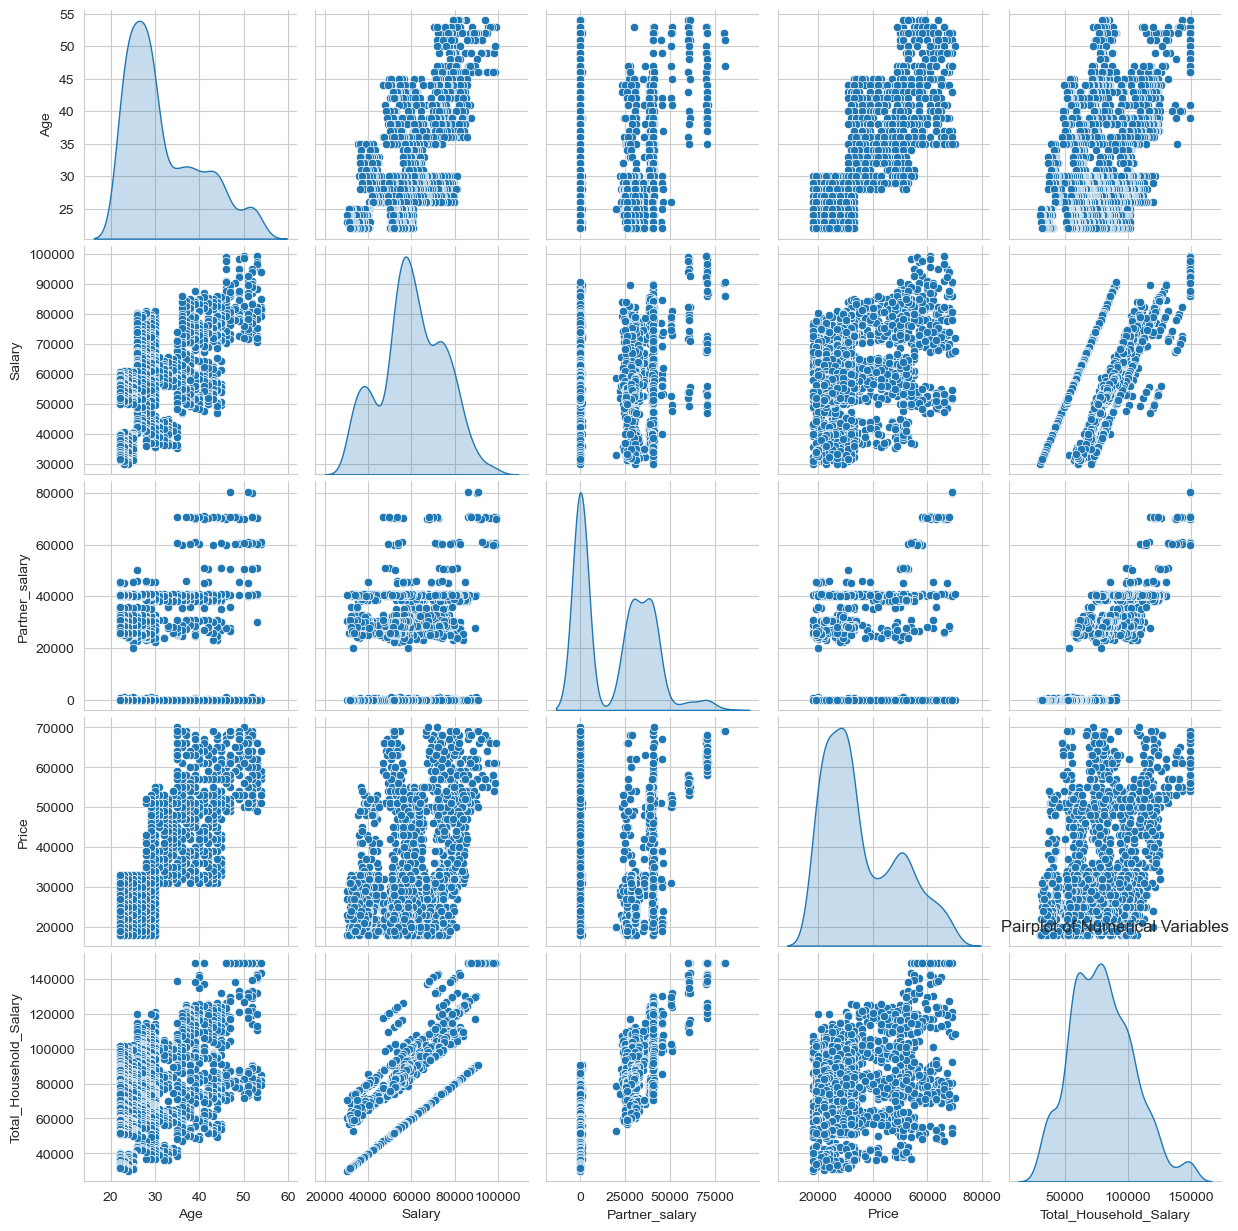

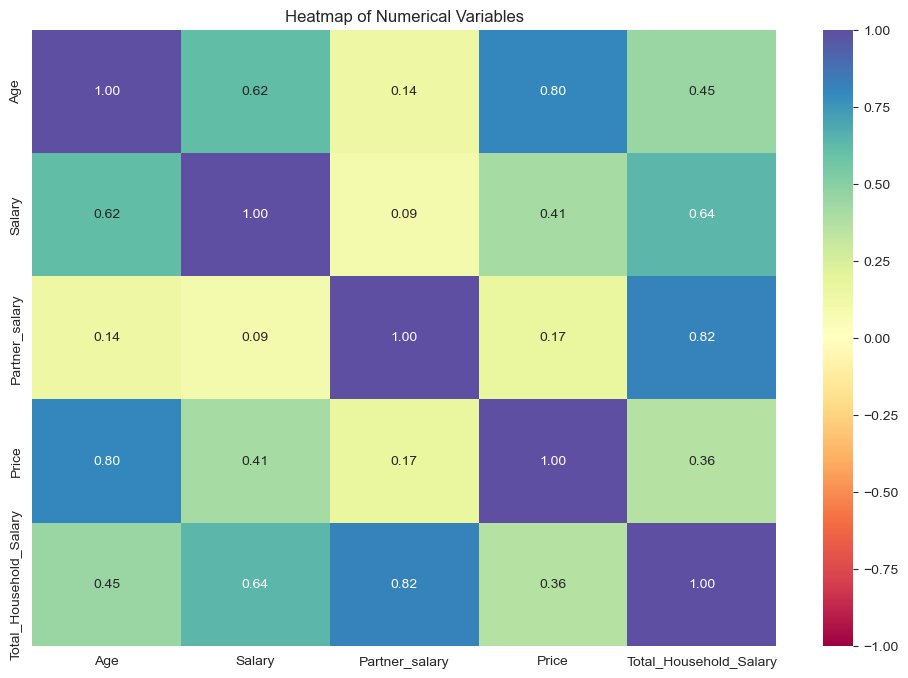

In [45]:
#Lets check for correlation among numerical variables
corr = df[num].corr()

#Plot the Pairplot
sns.pairplot(data=df[num], diag_kind="kde")
plt.title('Pairplot of Numerical Variables')
plt.show()

#Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Heatmap of Numerical Variables')
plt.show()

### 2. Bivariate Analysis of Categorical Variables

['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make', 'Age_category']


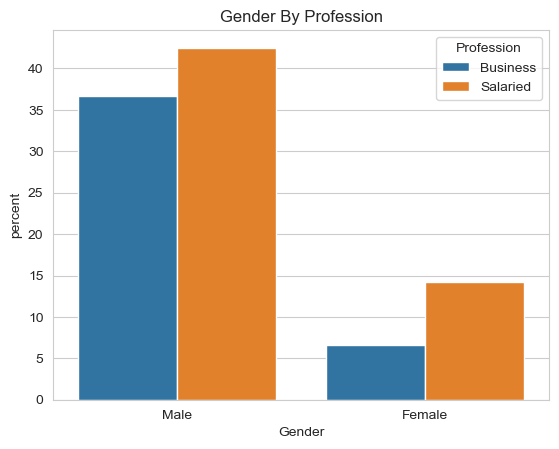

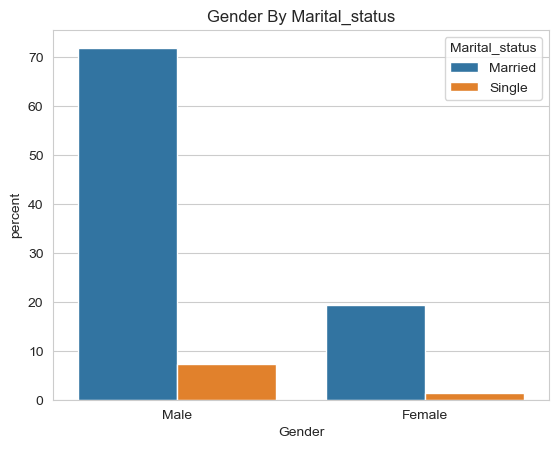

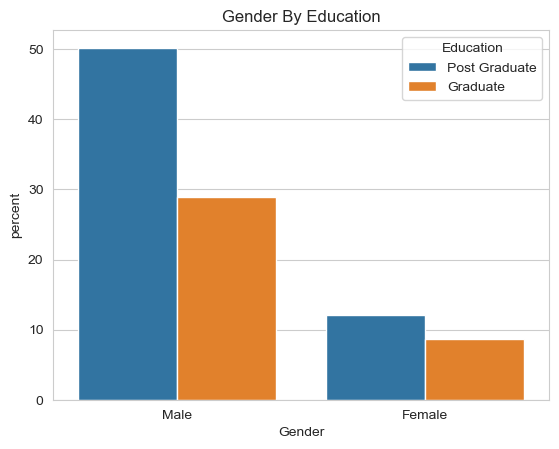

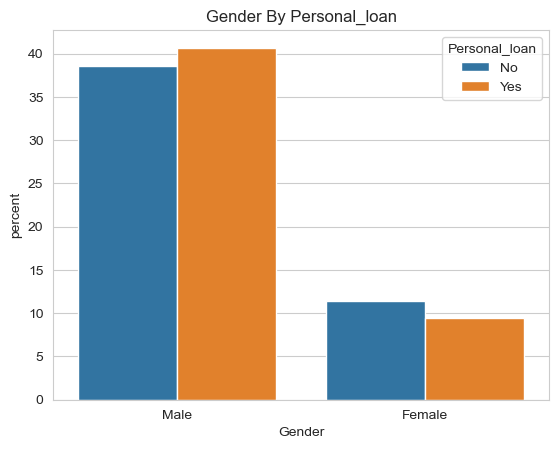

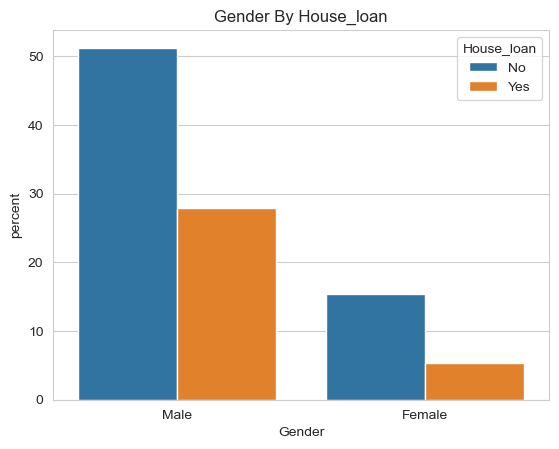

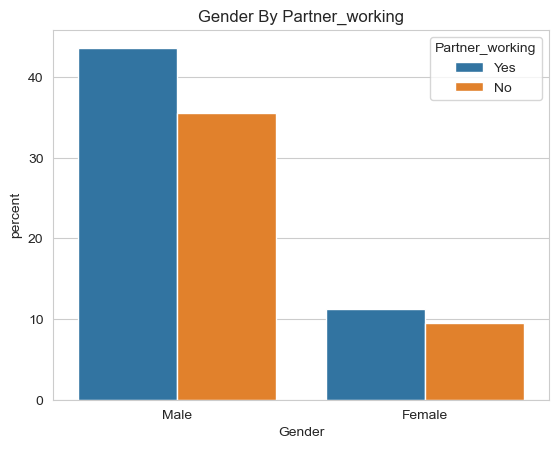

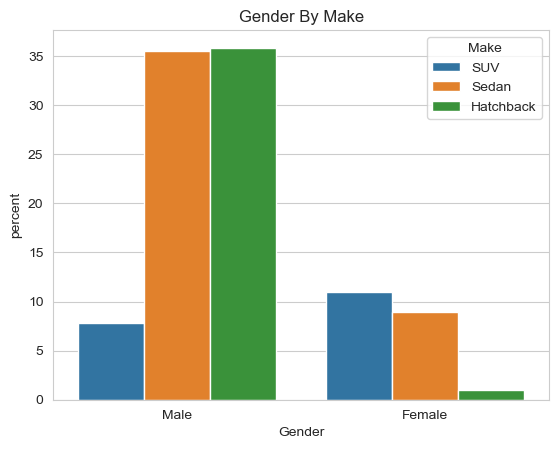

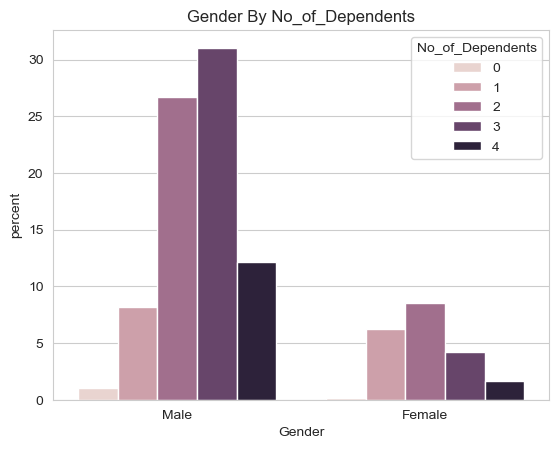

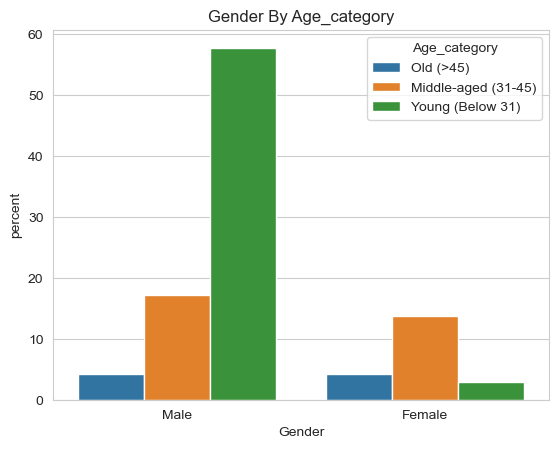

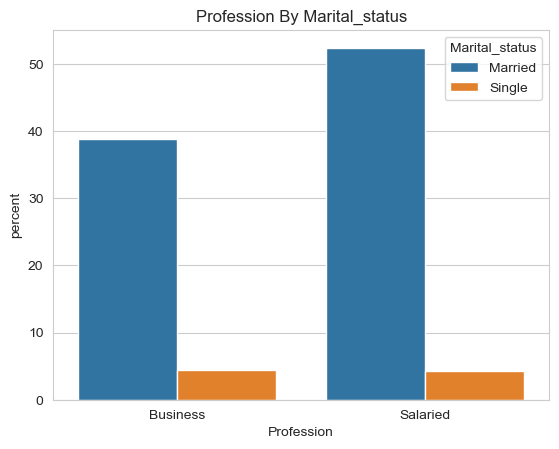

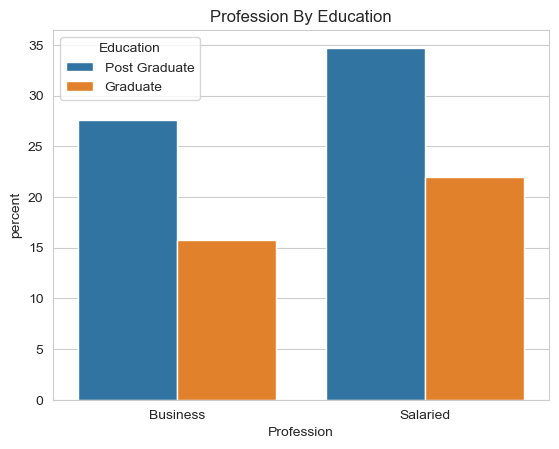

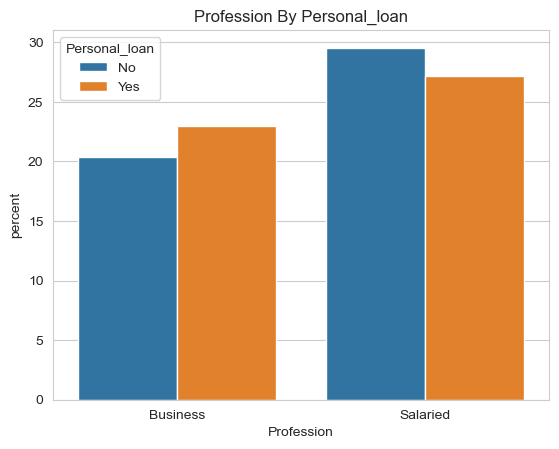

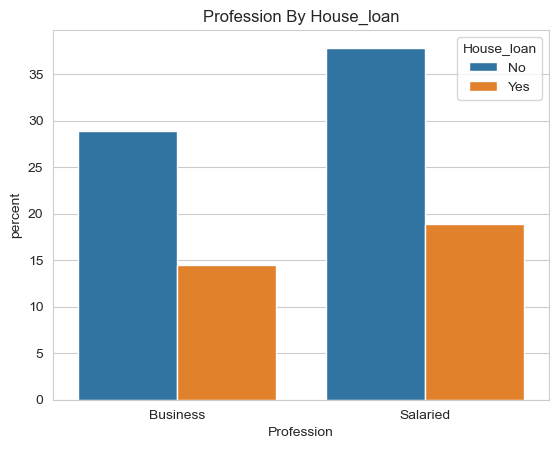

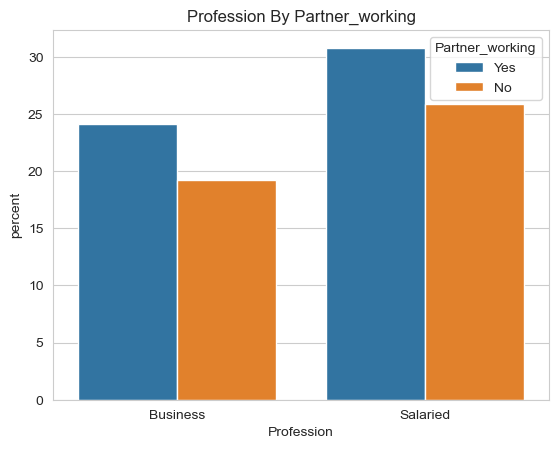

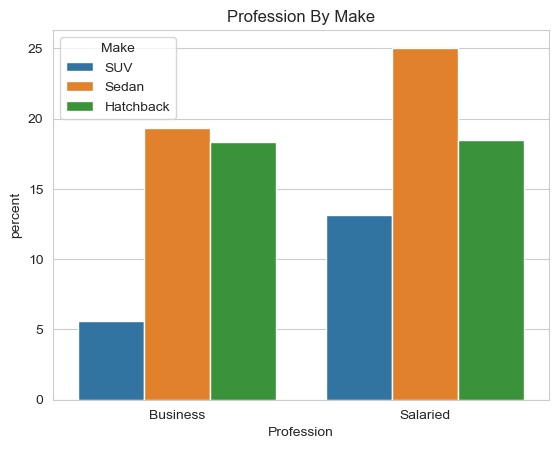

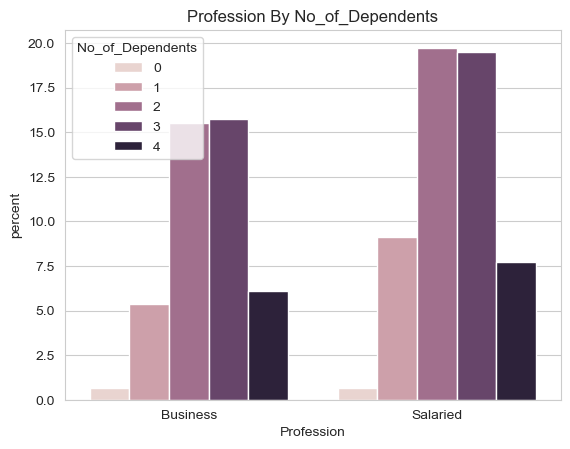

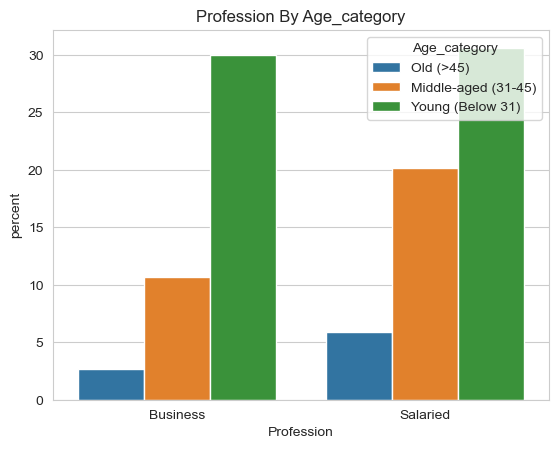

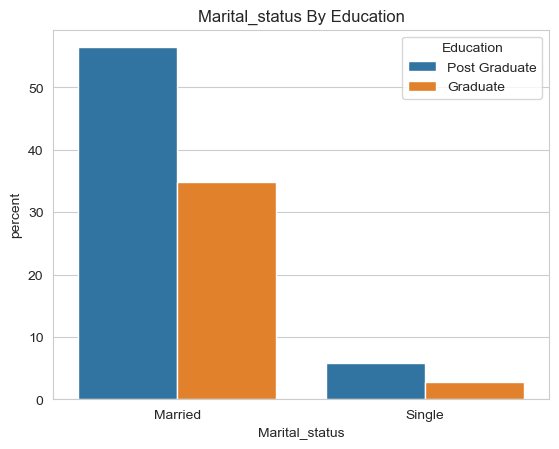

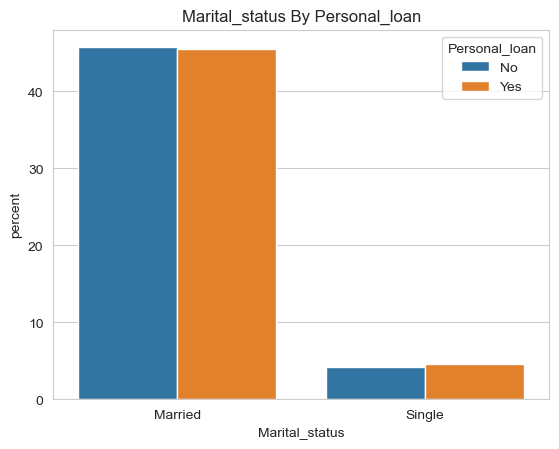

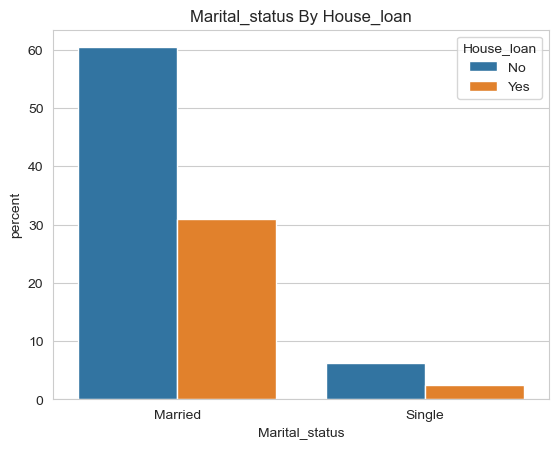

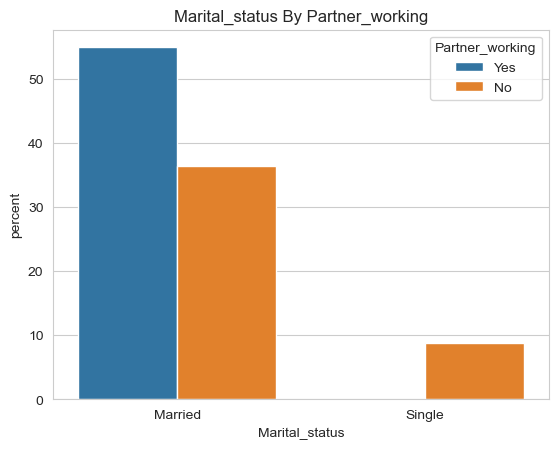

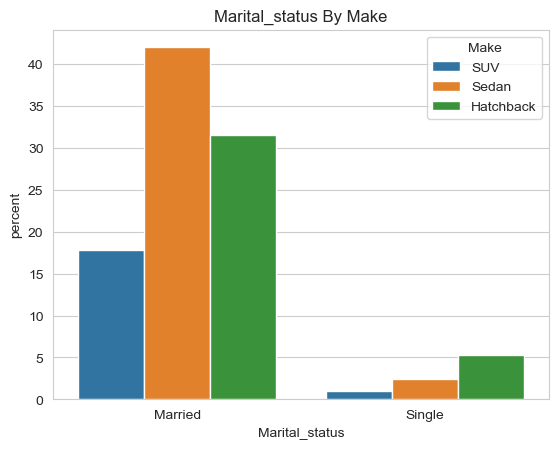

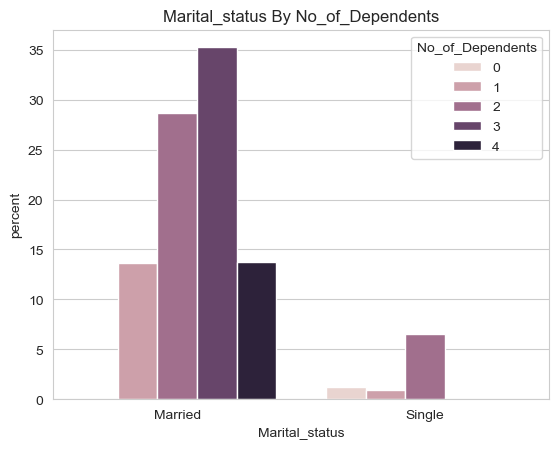

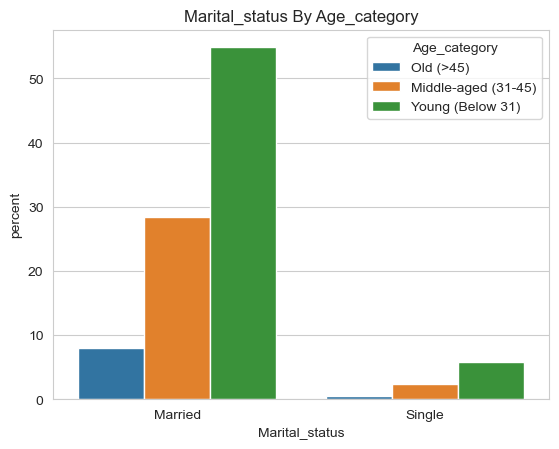

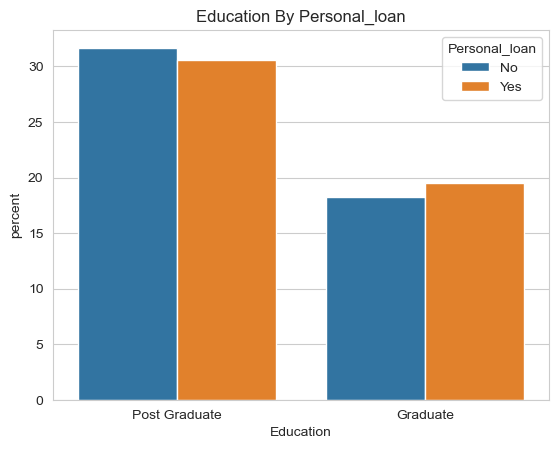

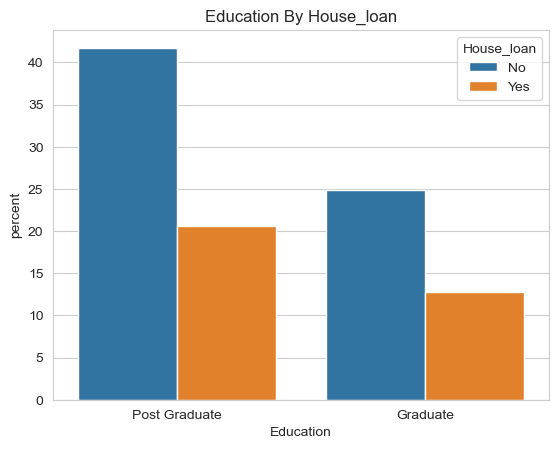

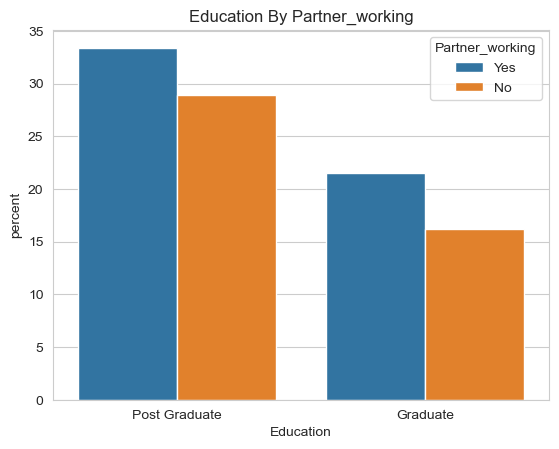

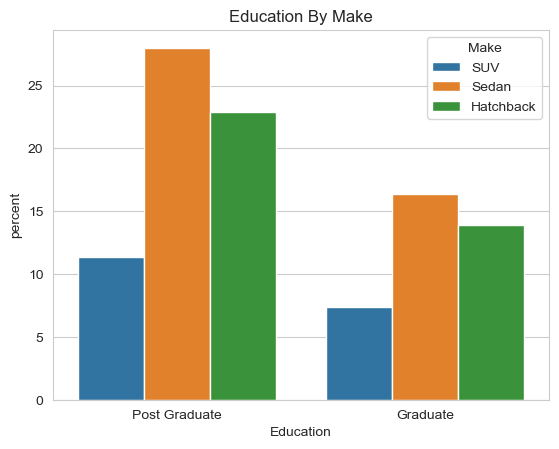

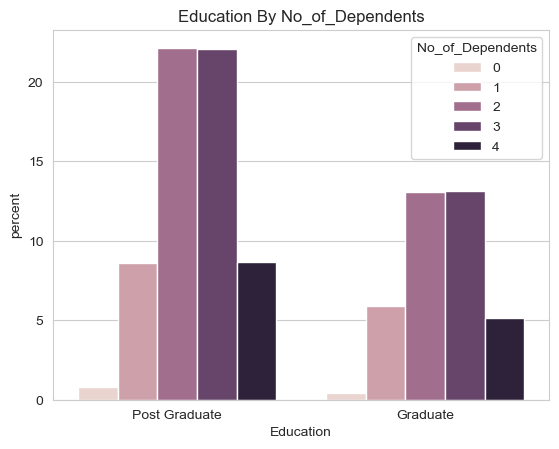

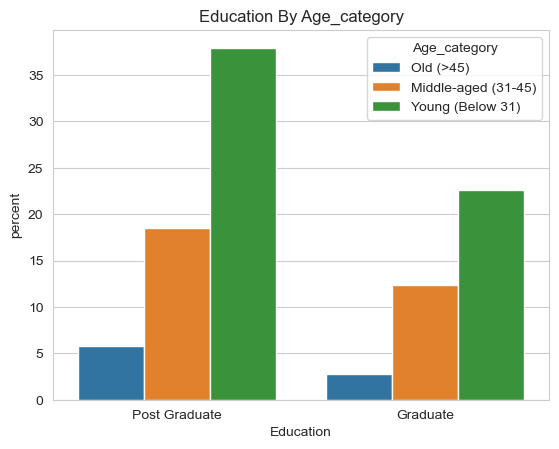

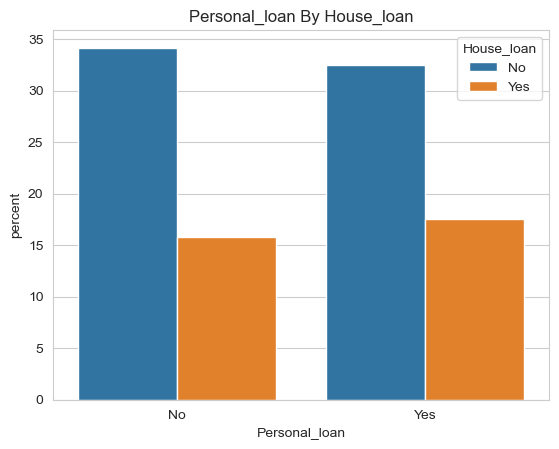

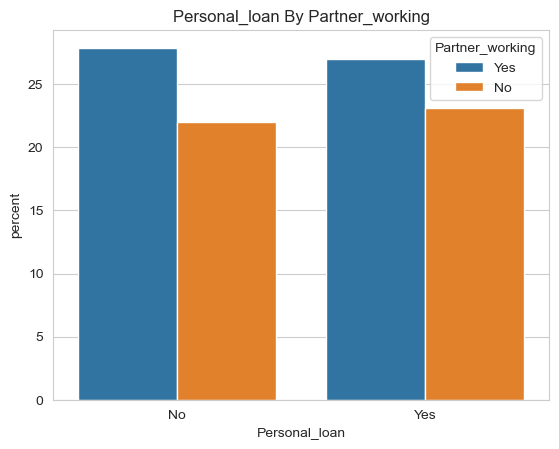

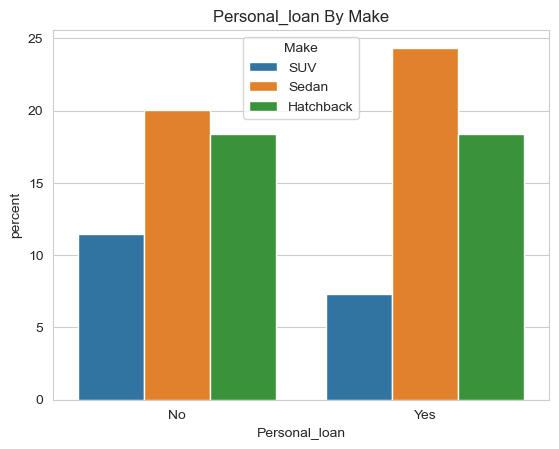

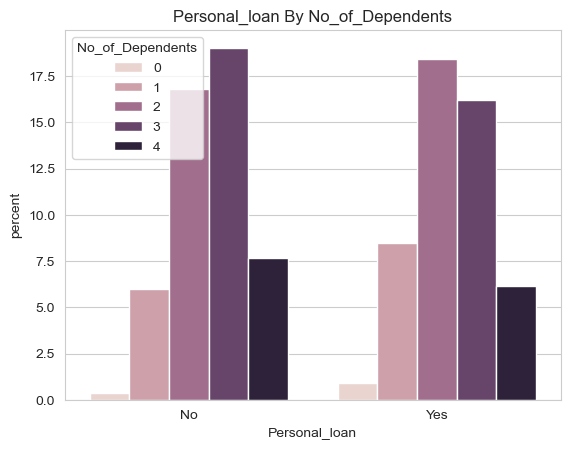

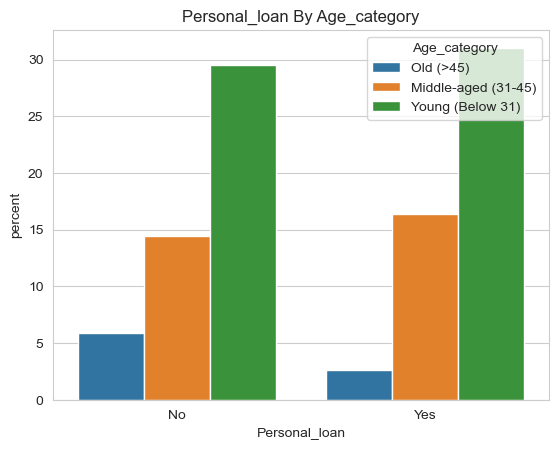

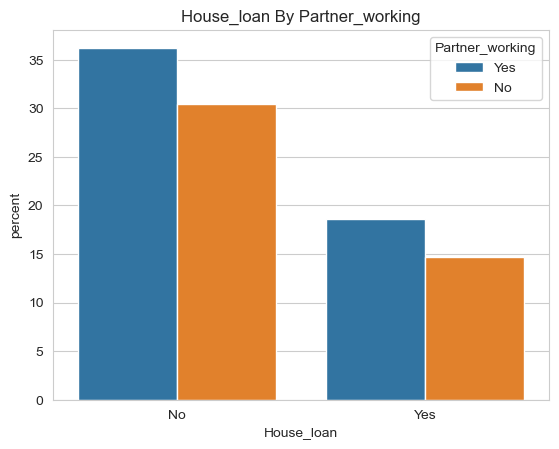

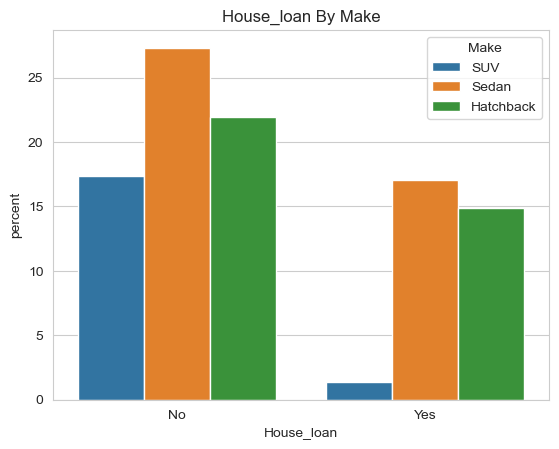

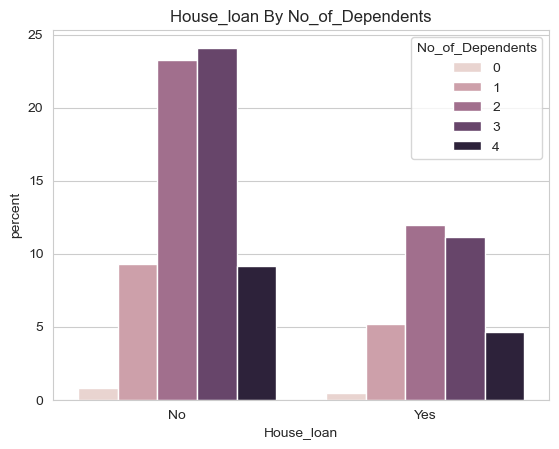

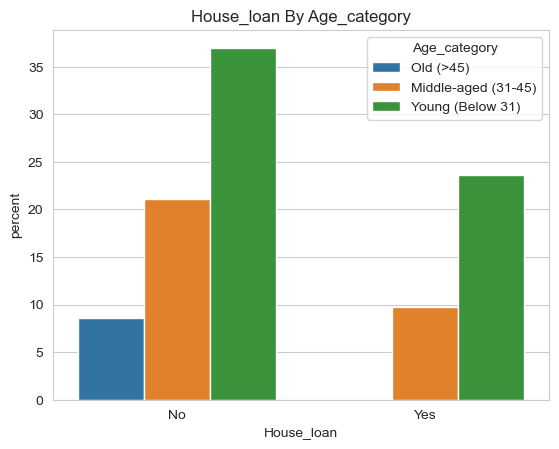

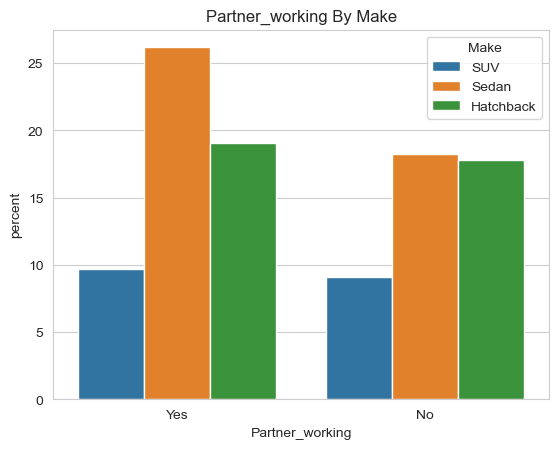

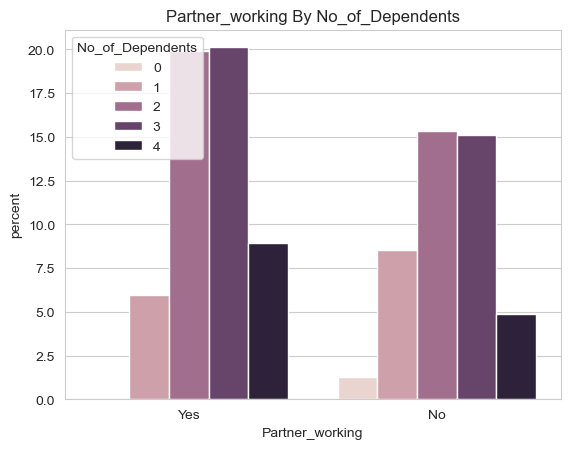

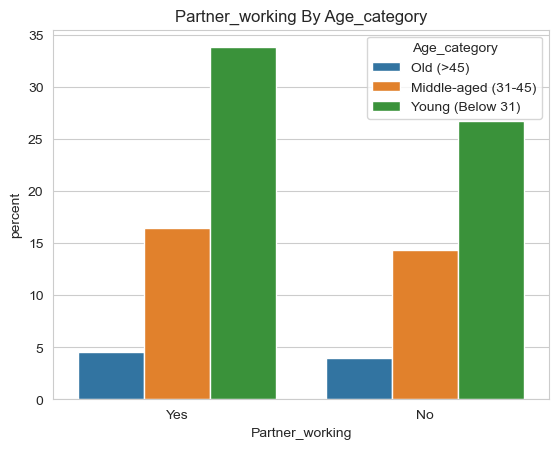

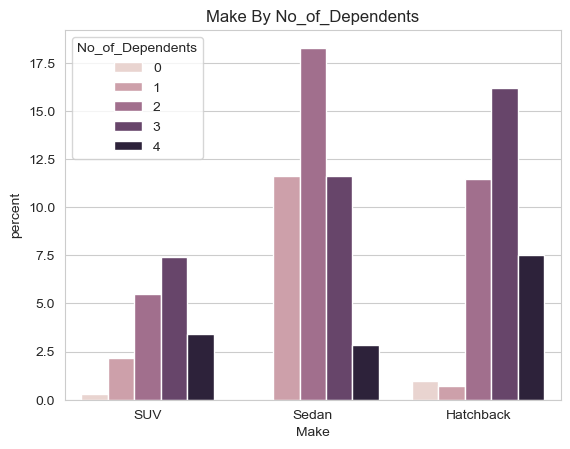

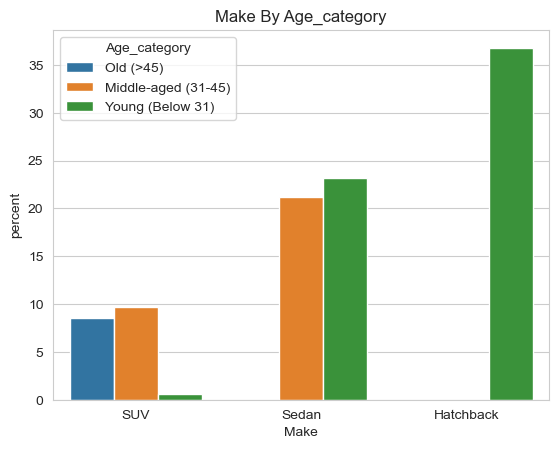

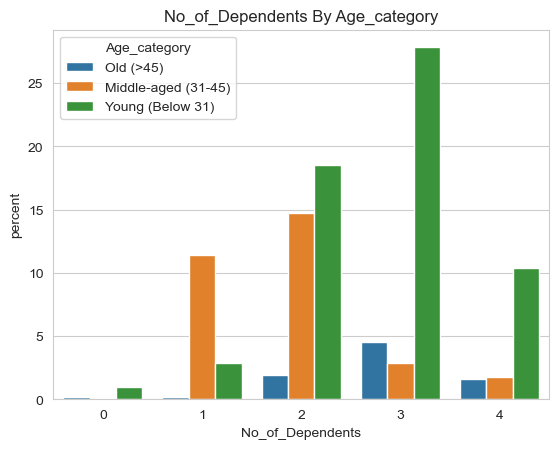

In [47]:
#Lets analyze further each category in relation to other categories
print(cat)
plt.title('Gender By Profession')
sns.countplot(data=df, x='Gender', hue='Profession', stat='percent')
plt.show()
plt.title('Gender By Marital_status')
sns.countplot(data=df, x='Gender', hue='Marital_status', stat='percent')
plt.show()
plt.title('Gender By Education')
sns.countplot(data=df, x='Gender', hue='Education', stat='percent')
plt.show()
plt.title('Gender By Personal_loan')
sns.countplot(data=df, x='Gender', hue='Personal_loan', stat='percent')
plt.show()
plt.title('Gender By House_loan')
sns.countplot(data=df, x='Gender', hue='House_loan', stat='percent')
plt.show()
plt.title('Gender By Partner_working')
sns.countplot(data=df, x='Gender', hue='Partner_working', stat='percent')
plt.show()
plt.title('Gender By Make')
sns.countplot(data=df, x='Gender', hue='Make', stat='percent')
plt.show()
plt.title('Gender By No_of_Dependents')
sns.countplot(data=df, x='Gender', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Gender By Age_category')
sns.countplot(data=df, x='Gender', hue='Age_category', stat='percent')
plt.show()

plt.title('Profession By Marital_status')
sns.countplot(data=df, x='Profession', hue='Marital_status', stat='percent')
plt.show()
plt.title('Profession By Education')
sns.countplot(data=df, x='Profession', hue='Education', stat='percent')
plt.show()
plt.title('Profession By Personal_loan')
sns.countplot(data=df, x='Profession', hue='Personal_loan', stat='percent')
plt.show()
plt.title('Profession By House_loan')
sns.countplot(data=df, x='Profession', hue='House_loan', stat='percent')
plt.show()
plt.title('Profession By Partner_working')
sns.countplot(data=df, x='Profession', hue='Partner_working', stat='percent')
plt.show()
plt.title('Profession By Make')
sns.countplot(data=df, x='Profession', hue='Make', stat='percent')
plt.show()
plt.title('Profession By No_of_Dependents')
sns.countplot(data=df, x='Profession', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Profession By Age_category')
sns.countplot(data=df, x='Profession', hue='Age_category', stat='percent')
plt.show()

plt.title('Marital_status By Education')
sns.countplot(data=df, x='Marital_status', hue='Education', stat='percent')
plt.show()
plt.title('Marital_status By Personal_loan')
sns.countplot(data=df, x='Marital_status', hue='Personal_loan', stat='percent')
plt.show()
plt.title('Marital_status By House_loan')
sns.countplot(data=df, x='Marital_status', hue='House_loan', stat='percent')
plt.show()
plt.title('Marital_status By Partner_working')
sns.countplot(data=df, x='Marital_status', hue='Partner_working', stat='percent')
plt.show()
plt.title('Marital_status By Make')
sns.countplot(data=df, x='Marital_status', hue='Make', stat='percent')
plt.show()
plt.title('Marital_status By No_of_Dependents')
sns.countplot(data=df, x='Marital_status', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Marital_status By Age_category')
sns.countplot(data=df, x='Marital_status', hue='Age_category', stat='percent')
plt.show()

plt.title('Education By Personal_loan')
sns.countplot(data=df, x='Education', hue='Personal_loan', stat='percent')
plt.show()
plt.title('Education By House_loan')
sns.countplot(data=df, x='Education', hue='House_loan', stat='percent')
plt.show()
plt.title('Education By Partner_working')
sns.countplot(data=df, x='Education', hue='Partner_working', stat='percent')
plt.show()
plt.title('Education By Make')
sns.countplot(data=df, x='Education', hue='Make', stat='percent')
plt.show()
plt.title('Education By No_of_Dependents')
sns.countplot(data=df, x='Education', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Education By Age_category')
sns.countplot(data=df, x='Education', hue='Age_category', stat='percent')
plt.show()

plt.title('Personal_loan By House_loan')
sns.countplot(data=df, x='Personal_loan', hue='House_loan', stat='percent')
plt.show()
plt.title('Personal_loan By Partner_working')
sns.countplot(data=df, x='Personal_loan', hue='Partner_working', stat='percent')
plt.show()
plt.title('Personal_loan By Make')
sns.countplot(data=df, x='Personal_loan', hue='Make', stat='percent')
plt.show()
plt.title('Personal_loan By No_of_Dependents')
sns.countplot(data=df, x='Personal_loan', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Personal_loan By Age_category')
sns.countplot(data=df, x='Personal_loan', hue='Age_category', stat='percent')
plt.show()

plt.title('House_loan By Partner_working')
sns.countplot(data=df, x='House_loan', hue='Partner_working', stat='percent')
plt.show()
plt.title('House_loan By Make')
sns.countplot(data=df, x='House_loan', hue='Make', stat='percent')
plt.show()
plt.title('House_loan By No_of_Dependents')
sns.countplot(data=df, x='House_loan', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('House_loan By Age_category')
sns.countplot(data=df, x='House_loan', hue='Age_category', stat='percent')
plt.show()

plt.title('Partner_working By Make')
sns.countplot(data=df, x='Partner_working', hue='Make', stat='percent')
plt.show()
plt.title('Partner_working By No_of_Dependents')
sns.countplot(data=df, x='Partner_working', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Partner_working By Age_category')
sns.countplot(data=df, x='Partner_working', hue='Age_category', stat='percent')
plt.show()

plt.title('Make By No_of_Dependents')
sns.countplot(data=df, x='Make', hue='No_of_Dependents', stat='percent')
plt.show()
plt.title('Make By Age_category')
sns.countplot(data=df, x='Make', hue='Age_category', stat='percent')
plt.show()

plt.title('No_of_Dependents By Age_category')
sns.countplot(data=df, x='No_of_Dependents', hue='Age_category', stat='percent')
plt.show()

### 3. Bivariate Analysis of Between Categorical & Numerical Variables

['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make', 'Age_category']
['Age', 'Salary', 'Partner_salary', 'Price', 'Total_Household_Salary']


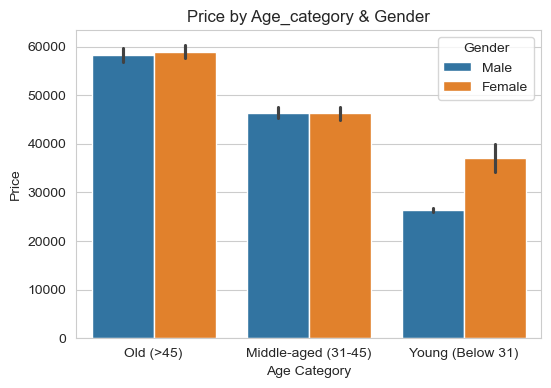

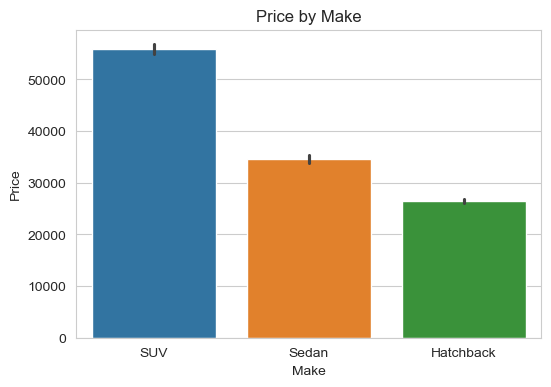

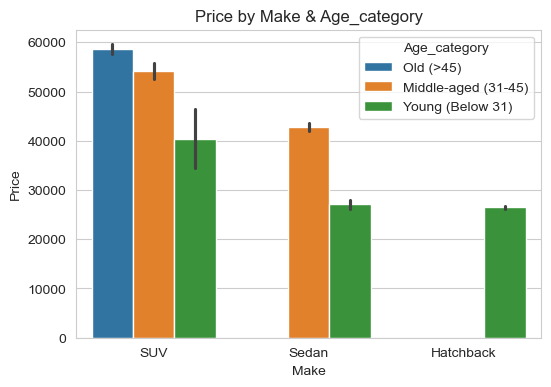

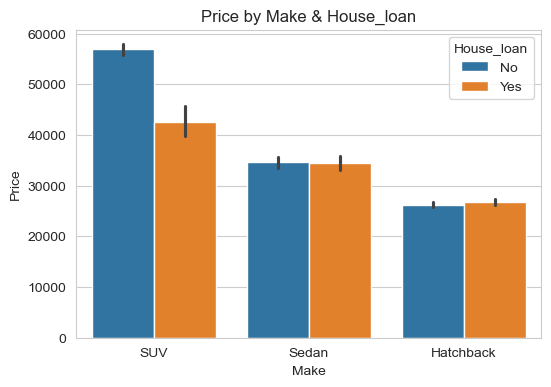

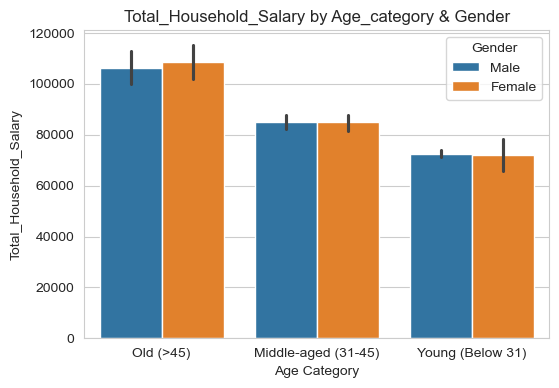

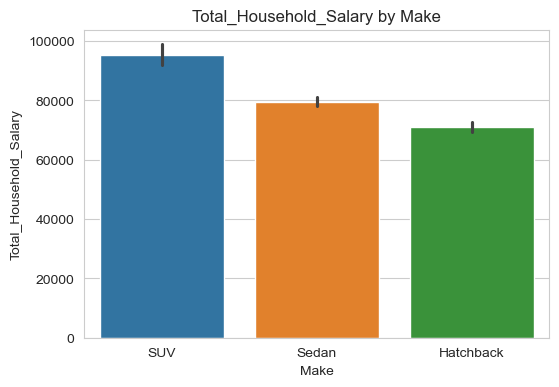

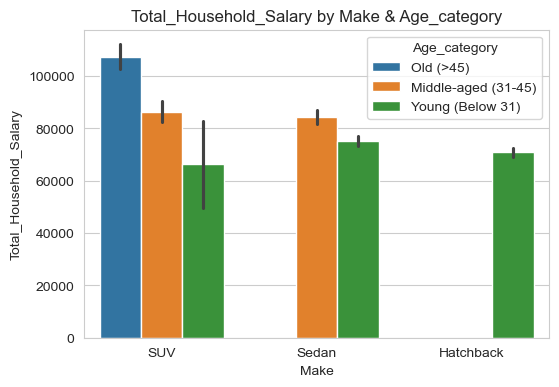

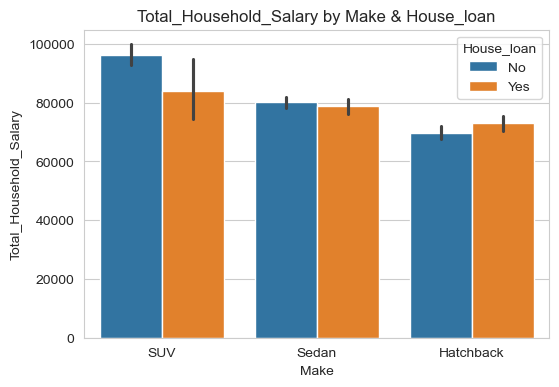

In [49]:
# Relationship between Salary and categorical variables
print(cat)
print(num)

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Age_category", y="Price", hue='Gender')
plt.title("Price by Age_category & Gender")
plt.xlabel("Age Category")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Price",hue='Make')
plt.title("Price by Make")
plt.xlabel("Make")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Price",hue='Age_category')
plt.title("Price by Make & Age_category")
plt.xlabel("Make")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Price",hue='House_loan')
plt.title("Price by Make & House_loan")
plt.xlabel("Make")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Age_category", y="Total_Household_Salary", hue='Gender')
plt.title("Total_Household_Salary by Age_category & Gender")
plt.xlabel("Age Category")
plt.ylabel("Total_Household_Salary")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Total_Household_Salary",hue='Make')
plt.title("Total_Household_Salary by Make")
plt.xlabel("Make")
plt.ylabel("Total_Household_Salary")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Total_Household_Salary",hue='Age_category')
plt.title("Total_Household_Salary by Make & Age_category")
plt.xlabel("Make")
plt.ylabel("Total_Household_Salary")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Total_Household_Salary",hue='House_loan')
plt.title("Total_Household_Salary by Make & House_loan")
plt.xlabel("Make")
plt.ylabel("Total_Household_Salary")
plt.show()

['Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Make', 'Age_category']
['Age', 'Salary', 'Partner_salary', 'Price', 'Total_Household_Salary']


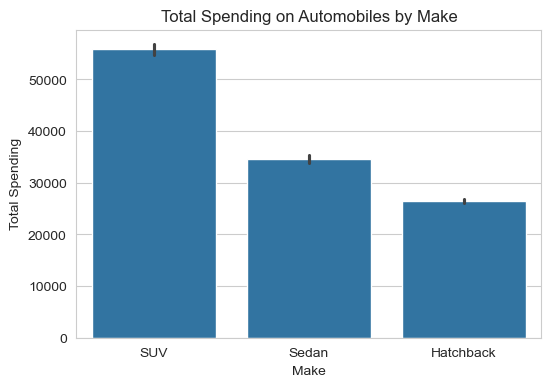

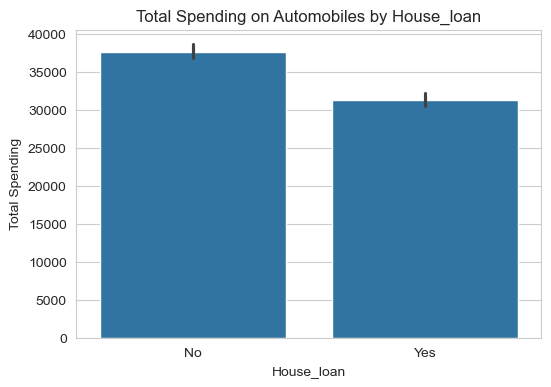

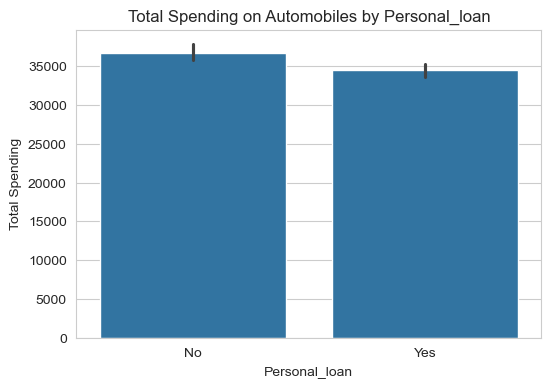

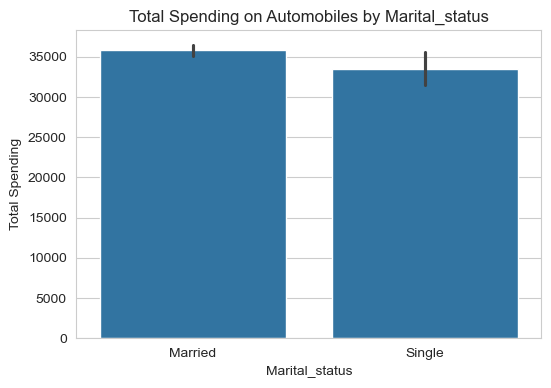

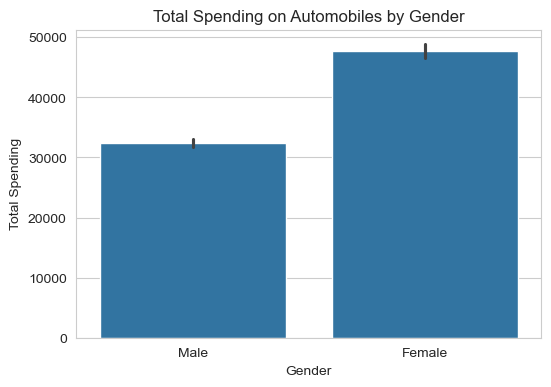

In [50]:
# Relationship between Price and categorical variables
print(cat)
print(num)

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Price")
plt.title("Total Spending on Automobiles by Make")
plt.xlabel("Make")
plt.ylabel("Total Spending")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="House_loan", y="Price")
plt.title("Total Spending on Automobiles by House_loan")
plt.xlabel("House_loan")
plt.ylabel("Total Spending")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Personal_loan", y="Price")
plt.title("Total Spending on Automobiles by Personal_loan")
plt.xlabel("Personal_loan")
plt.ylabel("Total Spending")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Marital_status", y="Price")
plt.title("Total Spending on Automobiles by Marital_status")
plt.xlabel("Marital_status")
plt.ylabel("Total Spending")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Gender", y="Price")
plt.title("Total Spending on Automobiles by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Spending")
plt.show()

### **Question 1:** Do men tend to prefer SUVs more compared to women?

Total Males/Females in Dataset Gender
Male      1252
Female     329
Name: count, dtype: int64
Total Males/Females who bought SUV in Dataset Gender
Female    173
Male      124
Name: count, dtype: int64
Male Proportion (Percent)= Gender
Male    9.904153
Name: count, dtype: float64
Female Proportion (Percent)= Gender
Female    52.583587
Name: count, dtype: float64


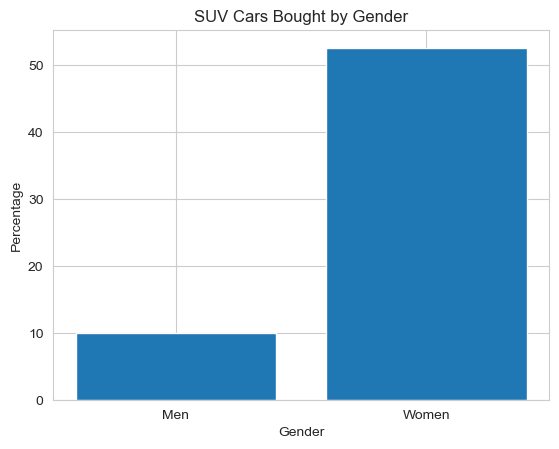

In [52]:
#Lets calculate total male/female in the dataset
print('Total Males/Females in Dataset',df['Gender'].value_counts())
#Lets calculate SUVs bought by gender
print('Total Males/Females who bought SUV in Dataset',df[df['Make']=='SUV']['Gender'].value_counts())

#Lets Calculate Ratio of SUV Buyers by Gender
Male_Ratio = (df[(df['Make']=='SUV') & (df['Gender']=='Male')]['Gender'].value_counts() / df[df['Gender']=='Male']['Gender'].value_counts())*100
Female_Ratio = (df[(df['Make']=='SUV') & (df['Gender']=='Female')]['Gender'].value_counts() / df[df['Gender']=='Female']['Gender'].value_counts())*100
print('Male Proportion (Percent)=',Male_Ratio)
print('Female Proportion (Percent)=',Female_Ratio)

x_axis = ['Men', 'Women']
y_axis = [9.90, 52.58]

plt.bar(x_axis, y_axis)
plt.title('SUV Cars Bought by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

### **Question 2:** What is the likelihood of a salaried person buying a Sedan?

Profession
Salaried    896
Business    685
Name: count, dtype: int64
Make
Sedan        396
Hatchback    292
SUV          208
Name: count, dtype: int64


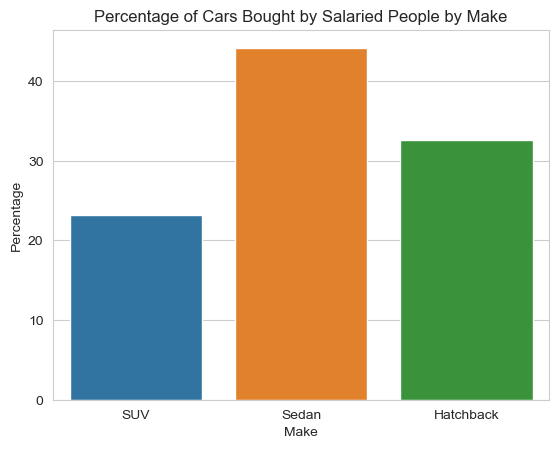

Salaried Male:- Profession
Salaried    672
Name: count, dtype: int64
Salaried Male:- Make
Sedan        305
Hatchback    277
SUV           90
Name: count, dtype: int64
Salaried Female:- Profession
Salaried    224
Name: count, dtype: int64
Salaried Female:- Make
SUV          118
Sedan         91
Hatchback     15
Name: count, dtype: int64


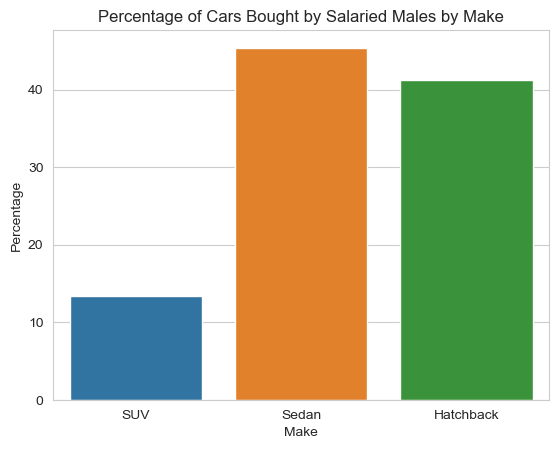

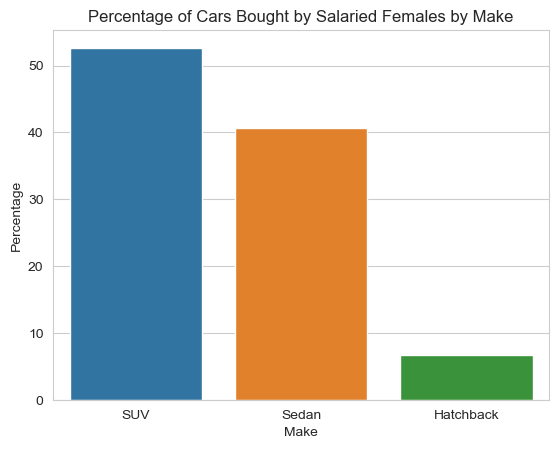

In [54]:
#lets take a subset of only salaried people
df_sal = df[(df['Profession']=='Salaried')]
df_sal_male = df[(df['Profession']=='Salaried') & (df['Gender']=='Male')]
df_sal_female = df[(df['Profession']=='Salaried') & (df['Gender']=='Female')]
print(df['Profession'].value_counts())
#lets see the distribution by Make
print(df_sal['Make'].value_counts())

#Plot Countplot of Salaried people by Make
sns.countplot(data=df_sal, x='Make', hue='Make', stat='percent')
plt.title('Percentage of Cars Bought by Salaried People by Make')
plt.xlabel('Make')
plt.ylabel('Percentage')
plt.show()

#Lets further delve the same analysis between Males 7 Females

print('Salaried Male:-',df_sal_male['Profession'].value_counts())
print('Salaried Male:-',df_sal_male['Make'].value_counts())
print('Salaried Female:-',df_sal_female['Profession'].value_counts())
print('Salaried Female:-',df_sal_female['Make'].value_counts())

#Plot Countplot of Salaried Males by Make
sns.countplot(data=df_sal_male, x='Make', hue ='Make',stat='percent')
plt.title('Percentage of Cars Bought by Salaried Males by Make')
plt.xlabel('Make')
plt.ylabel('Percentage')
plt.show()

#Plot Countplot of Salaried Females by Make
sns.countplot(data=df_sal_female, x='Make',hue ='Make', stat='percent')
plt.title('Percentage of Cars Bought by Salaried Females by Make')
plt.xlabel('Make')
plt.ylabel('Percentage')
plt.show()

### **Question 3:** What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

Total Salaried Male = 672
Salaried Male Counts by Make
Sedan        305
Hatchback    277
SUV           90
Name: count, dtype: int64
Salaried Male Percentage by  Make
Sedan        0.453869
Hatchback    0.412202
SUV          0.133929
Name: proportion, dtype: float64


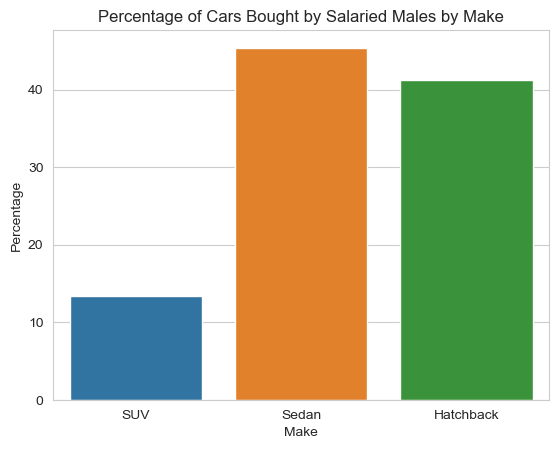

In [56]:
#Salaried Male Count
print('Total Salaried Male =',df_sal_male.shape[0])
#Car Type Distribution of Salaried Males
print('Salaried Male Counts by',df_sal_male['Make'].value_counts())
print('Salaried Male Percentage by ',df_sal_male['Make'].value_counts(normalize=True))

#Plot distribution of Car type for Salared Males
sns.countplot(data=df_sal_male, x='Make', hue='Make', stat='percent')
plt.title('Percentage of Cars Bought by Salaried Males by Make')
plt.xlabel('Make')
plt.ylabel('Percentage')
plt.show()

### **Question 4:** How does the the amount spent on purchasing automobiles vary by gender?

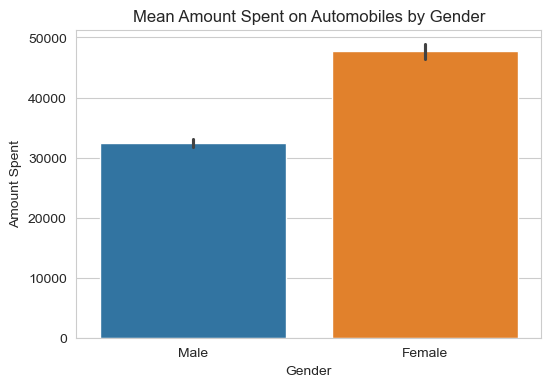

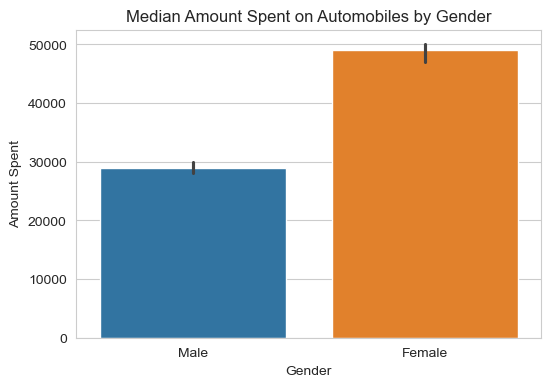

Mean Price Spent by  Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64
Median Price Spent by  Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64


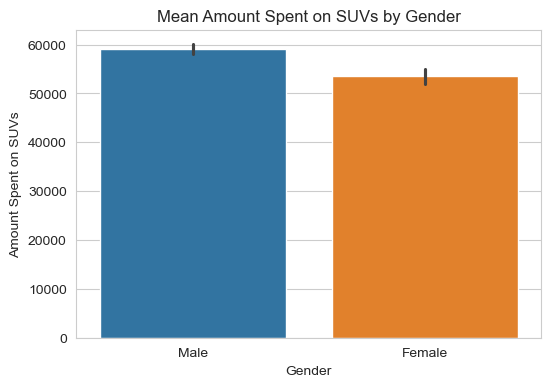

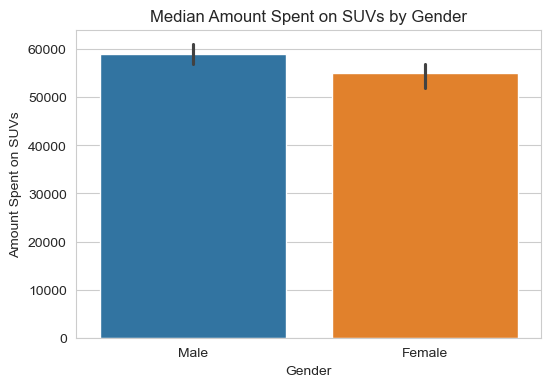

Mean Price Spent on SUV by  Gender
Female    53479.768786
Male      59096.774194
Name: Price, dtype: float64
Median Price Spent on SUV by  Gender
Female    55000.0
Male      59000.0
Name: Price, dtype: float64


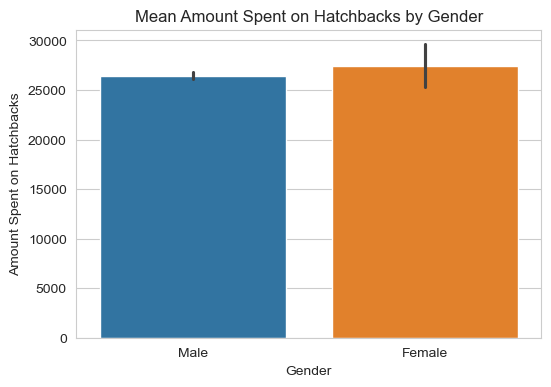

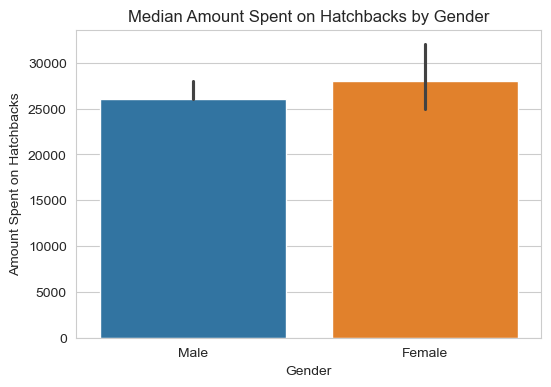

Mean Price Spent on Hatchbacks by  Gender
Female    27466.666667
Male      26447.971781
Name: Price, dtype: float64
Median Price Spent on Hatchbacks by  Gender
Female    28000.0
Male      26000.0
Name: Price, dtype: float64


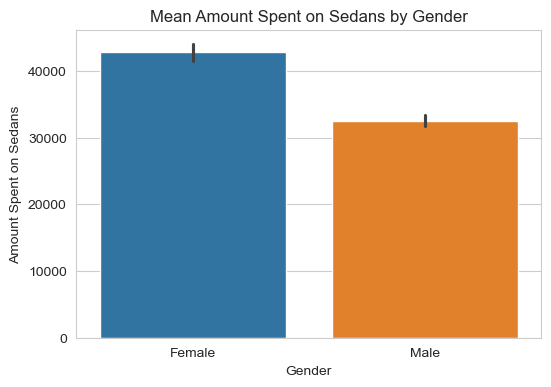

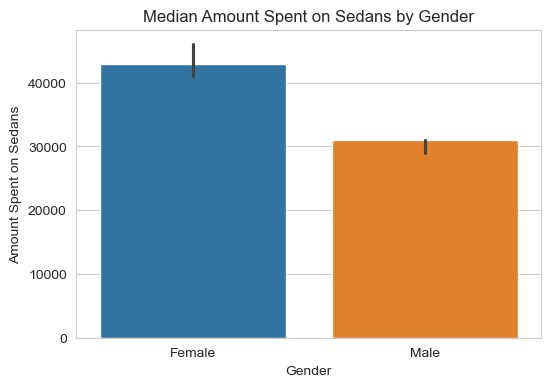

Mean Price Spent on Sedans by  Gender
Female    42773.049645
Male      32550.802139
Name: Price, dtype: float64
Median Price Spent on Sedans by  Gender
Female    43000.0
Male      31000.0
Name: Price, dtype: float64


In [58]:
#Lets loot at the barplot between Price & Gender
#Spending on all Car Types by Gender
plt.figure(figsize=(6, 4))
plt.ticklabel_format(style='plain')
sns.barplot(data=df, x="Gender", y="Price", hue='Gender',estimator='mean')
plt.title("Mean Amount Spent on Automobiles by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent")
plt.show()

plt.figure(figsize=(6, 4))
plt.ticklabel_format(style='plain')
sns.barplot(data=df, x="Gender", y="Price", hue='Gender',estimator='median')
plt.title("Median Amount Spent on Automobiles by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent")
plt.show()

print('Mean Price Spent by ',df.groupby(['Gender'])['Price'].mean())
print('Median Price Spent by ',df.groupby(['Gender'])['Price'].median())

df_suv = df[df['Make']=='SUV']
df_hatch = df[df['Make']=='Hatchback']
df_sedan = df[df['Make']=='Sedan']

#Spending on SUVs by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df_suv, x="Gender", y="Price", hue='Gender',estimator='mean')
plt.title("Mean Amount Spent on SUVs by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent on SUVs")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df_suv, x="Gender", y="Price", hue='Gender',estimator='median')
plt.title("Median Amount Spent on SUVs by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent on SUVs")
plt.show()

print('Mean Price Spent on SUV by ',df_suv.groupby(['Gender'])['Price'].mean())
print('Median Price Spent on SUV by ',df_suv.groupby(['Gender'])['Price'].median())

#Total Spending of Hatchbacks by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df_hatch, x="Gender", y="Price", hue='Gender',estimator='mean')
plt.title("Mean Amount Spent on Hatchbacks by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent on Hatchbacks")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df_hatch, x="Gender", y="Price", hue='Gender',estimator='median')
plt.title("Median Amount Spent on Hatchbacks by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent on Hatchbacks")
plt.show()

print('Mean Price Spent on Hatchbacks by ',df_hatch.groupby(['Gender'])['Price'].mean())
print('Median Price Spent on Hatchbacks by ',df_hatch.groupby(['Gender'])['Price'].median())

#Total Spending of Sedans by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df_sedan, x="Gender", y="Price", hue='Gender',estimator='mean')
plt.title("Mean Amount Spent on Sedans by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent on Sedans")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df_sedan, x="Gender", y="Price", hue='Gender',estimator='median')
plt.title("Median Amount Spent on Sedans by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent on Sedans")
plt.show()

print('Mean Price Spent on Sedans by ',df_sedan.groupby(['Gender'])['Price'].mean())
print('Median Price Spent on Sedans by ',df_sedan.groupby(['Gender'])['Price'].median())

### **Question 5:** How much money was spent on purchasing automobiles by individuals who took a personal loan?

Count of People:- Personal_loan
Yes    792
No     789
Name: count, dtype: int64
Mean Spending:- Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64


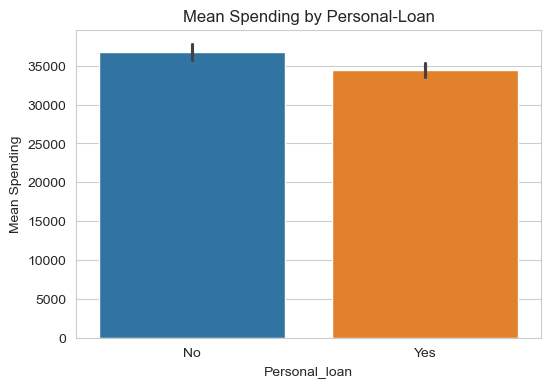

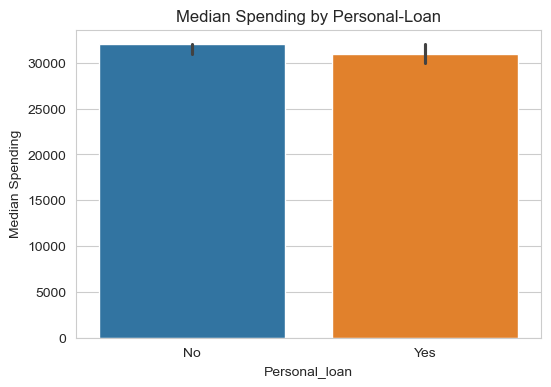

<function matplotlib.pyplot.show(close=None, block=None)>

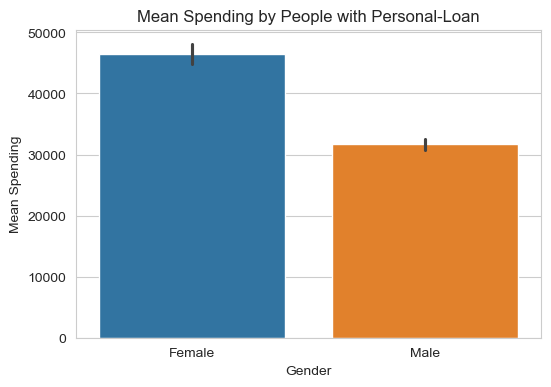

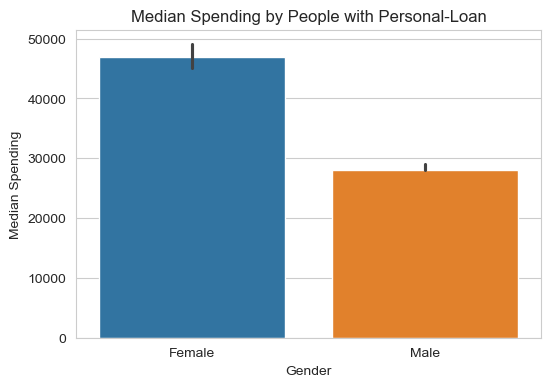

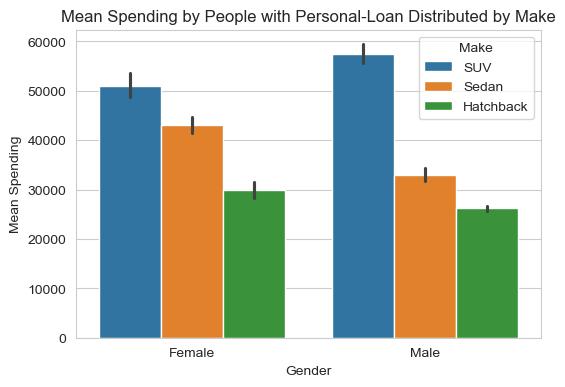

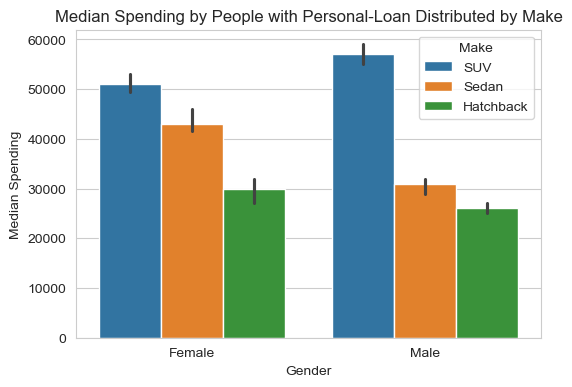

In [60]:
print('Count of People:-',df['Personal_loan'].value_counts())
print('Mean Spending:-',df.groupby('Personal_loan')['Price'].mean())

#Create subsets with & without personal loan
df_PL_yes = df[df['Personal_loan']=='Yes']
df_PL_no = df[df['Personal_loan']=='No']
#Create subsets of males & females with personal loan
df_male = df_PL_yes[df_PL_yes['Gender']=='Male']
df_female = df_PL_yes[df_PL_yes['Gender']=='Female']

#plot barplot between Personal loan & Price
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Personal_loan", y="Price",hue='Personal_loan', estimator = 'mean')
plt.title("Mean Spending by Personal-Loan")
plt.xlabel("Personal_loan")
plt.ylabel("Mean Spending")
plt.show
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Personal_loan", y="Price", hue='Personal_loan',estimator = 'median')
plt.title("Median Spending by Personal-Loan")
plt.xlabel("Personal_loan")
plt.ylabel("Median Spending")
plt.show()

#plot barplot between Gender & Price (Mean) for those with Personal Loan
plt.figure(figsize=(6, 4))
sns.barplot(data=df_PL_yes, x="Gender", y="Price",hue='Gender', estimator = 'mean')
plt.title("Mean Spending by People with Personal-Loan")
plt.xlabel("Gender")
plt.ylabel("Mean Spending")
plt.show

#plot barplot between Gender & Price (Median) for those with Personal Loan
plt.figure(figsize=(6, 4))
sns.barplot(data=df_PL_yes, x="Gender", y="Price",hue='Gender', estimator = 'median')
plt.title("Median Spending by People with Personal-Loan")
plt.xlabel("Gender")
plt.ylabel("Median Spending")
plt.show

#plot barplot between Gender & Price (Mean) for those with Personal Loan, basis Car Types
plt.figure(figsize=(6, 4))
sns.barplot(data=df_PL_yes, x="Gender", y="Price",hue='Make', estimator = 'mean')
plt.title("Mean Spending by People with Personal-Loan Distributed by Make")
plt.xlabel("Gender")
plt.ylabel("Mean Spending")
plt.show

#plot barplot between Gender & Price (Median) for those with Personal Loan, basis Car Types
plt.figure(figsize=(6, 4))
sns.barplot(data=df_PL_yes, x="Gender", y="Price",hue='Make', estimator = 'median')
plt.title("Median Spending by People with Personal-Loan Distributed by Make")
plt.xlabel("Gender")
plt.ylabel("Median Spending")
plt.show

### **Question 6:** How does having a working partner influence the purchase of higher-priced cars?

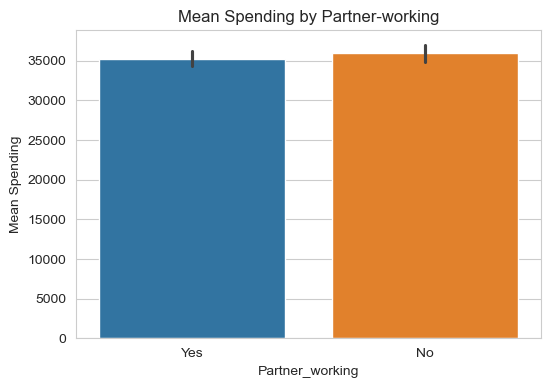

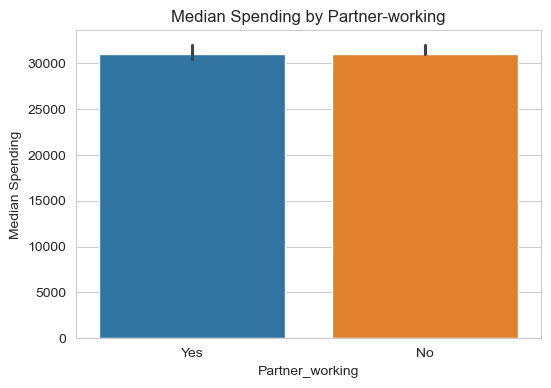

High-priced Car Purchases (>Rs. 55,000) by  Partner_working
No     86
Yes    84
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

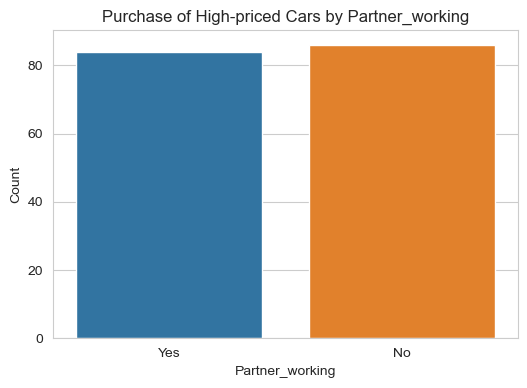

In [62]:
#Plot barplot between Partner_working & price
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Partner_working", y="Price",hue='Partner_working', estimator='mean')
plt.title("Mean Spending by Partner-working")
plt.xlabel("Partner_working")
plt.ylabel("Mean Spending")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Partner_working", y="Price", hue='Partner_working', estimator='median')
plt.title("Median Spending by Partner-working")
plt.xlabel("Partner_working")
plt.ylabel("Median Spending")
plt.show()

#Create a subset with high-priced cars ie above Rs. 50K
df_high_price_cars = df[df['Price']>55000]
print('High-priced Car Purchases (>Rs. 55,000) by ',df_high_price_cars['Partner_working'].value_counts())

#Plot a coutplot to show distribution of purchases for high-priced cars between a working & a non-working partner
plt.figure(figsize=(6, 4))
sns.countplot(data=df_high_price_cars, x="Partner_working",hue='Partner_working')
plt.title("Purchase of High-priced Cars by Partner_working")
plt.xlabel("Partner_working")
plt.ylabel("Count")
plt.show

## **Actionable Insights & Recommendations**

Gender  Marital_status  Make     
Female  Married         Hatchback     14
                        SUV          166
                        Sedan        127
        Single          Hatchback      1
                        SUV            7
                        Sedan         14
Male    Married         Hatchback    484
                        SUV          115
                        Sedan        537
        Single          Hatchback     83
                        SUV            9
                        Sedan         24
Name: count, dtype: int64
Gender  Marital_status
Female  Married                 SUV
        Single                Sedan
Male    Married               Sedan
        Single            Hatchback
Name: Make, dtype: object


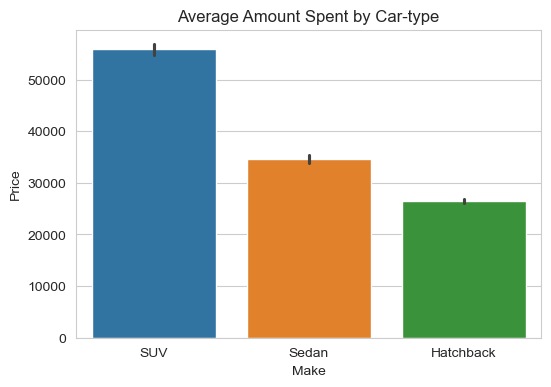

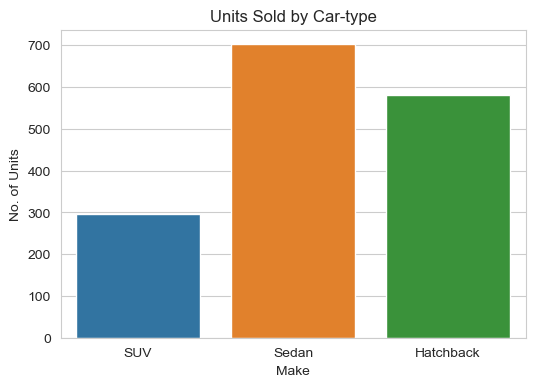

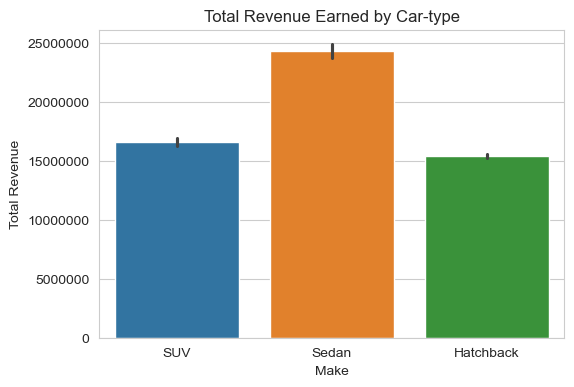

Age_category         Gender  Marital_status
Middle-aged (31-45)  Female  Married               Sedan
                             Single                Sedan
                     Male    Married               Sedan
                             Single                Sedan
Old (>45)            Female  Married                 SUV
                             Single                  SUV
                     Male    Married                 SUV
                             Single                  SUV
Young (Below 31)     Female  Married               Sedan
                             Single                Sedan
                     Male    Married           Hatchback
                             Single            Hatchback
Name: Make, dtype: object
House_loan  Gender  Age_category       
No          Female  Middle-aged (31-45)          SUV
                    Old (>45)                    SUV
                    Young (Below 31)       Hatchback
            Male    Middle-aged (31-45)        

In [64]:
#Lets segment customers based on Gender & Marital Status
print(df.groupby(['Gender','Marital_status','Make'])['Make'].value_counts())
print(df.groupby(['Gender','Marital_status'])['Make'].agg(pd.Series.mode))

#Lets analyse the data by checking the Amount spent for each Car-type
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Make", y="Price", hue='Make', estimator='mean')
plt.title("Average Amount Spent by Car-type")
plt.xlabel("Make")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Make", hue='Make')
plt.title("Units Sold by Car-type")
plt.xlabel("Make")
plt.ylabel("No. of Units")
plt.show()

plt.figure(figsize=(6, 4))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=df, x="Make", y="Price", hue='Make', estimator='sum')
plt.title("Total Revenue Earned by Car-type")
plt.xlabel("Make")
plt.ylabel("Total Revenue")
plt.show()

#Lets analyse Car-type by Age-category, Gender & Marital Status
print(df.groupby(['Age_category','Gender','Marital_status'])['Make'].agg(pd.Series.mode))

#Lets analyse Car type by House Loan
print(df.groupby(['House_loan','Gender','Age_category'])['Make'].agg(pd.Series.mode))

#Lets analyse Car-type by Mean of Total Household Salary
print(df.groupby(['Make','Gender'])['Total_Household_Salary'].mean())